In [348]:
import pandas as pd
import cPickle
import datetime
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
from cuisinify import *

%matplotlib inline

In [154]:
df = cPickle.load(open('assets/big_df.p', 'rb'))

In [155]:
len(df)

18668

In [156]:
df.head(1).T

,0
name,Bellevue
cuisine,Catalan
blurb,Now here is a delicious find! The menu positiv...
num_words,46
high_price,58
low_price,32
currency,EUR
distinctions,"[[bib-gourmand], [standing-13]]"
photos,[https://download.viamichelin.com/media/image/...
photo_count,6


In [157]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1873, 1874, 1875,    0,    1,    2,    3,    4,    5,    6],
           dtype='int64', length=18668)

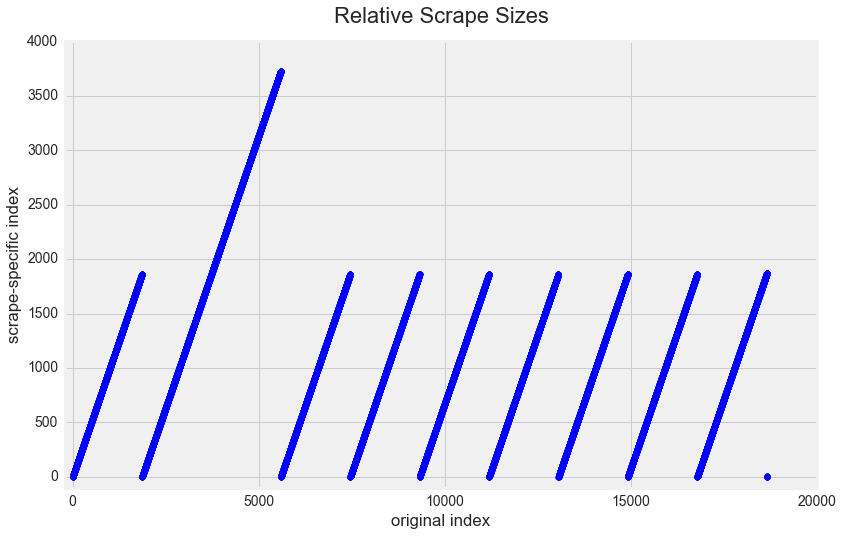

In [158]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(range(0, len(df)), df.index, color = 'blue', \
            alpha = 1, s = 30, label = 'included')

plt.title('Relative Scrape Sizes', fontsize = 22, y = 1.03)

# y label
plt.ylabel('scrape-specific index')

# x label
plt.xlabel('original index')

# set the figure boundaries
plt.ylim([-100, 4000])
plt.xlim([-200, 20000])
plt.grid(True)
#plt.legend(loc='center right', fontsize = 8)

plt.show()

In [159]:
df = df.reset_index(drop = True)

In [160]:
df.isnull().sum()

name                 7
cuisine              9
blurb                7
num_words            0
high_price           7
low_price            7
currency             7
distinctions         7
photos               0
photo_count          0
add_info             7
latitude             7
longitude            7
comments           459
num_comments         0
special_comment    459
dtype: int64

In [164]:
df[df['cuisine'].isnull()][['name', 'cuisine', 'blurb', 'currency']]

,name,cuisine,blurb,currency
1686,None,None,None,None
3475,None,None,None,None
5122,None,None,None,None
15338,None,None,None,None
16273,None,None,None,None
17939,Lor 9 Beef Kway Teow,None,Beef Kway Teow is their very popular signature...,SGD
18013,Nasi Lemak Kukus,None,The flavoursome Nasi Lemak comes with a wide s...,SGD
18147,None,None,None,None
18665,None,None,None,None


Drop all except the two with all values True except 'cuisine':

In [165]:
df = df.drop(df.index[[1686, 3475, 5122, 15338, 16273, 18147, 18665]])
df = df.reset_index(drop = True)

In [166]:
df.isnull().sum()

name                 0
cuisine              2
blurb                0
num_words            0
high_price           0
low_price            0
currency             0
distinctions         0
photos               0
photo_count          0
add_info             0
latitude             0
longitude            0
comments           459
num_comments         0
special_comment    459
dtype: int64

In [167]:
df.dtypes

name                object
cuisine             object
blurb               object
num_words            int64
high_price          object
low_price          float64
currency            object
distinctions        object
photos              object
photo_count          int64
add_info            object
latitude           float64
longitude          float64
comments            object
num_comments         int64
special_comment     object
dtype: object

In [168]:
df['num_comments'].value_counts()

7    18202
0      459
Name: num_comments, dtype: int64

In [169]:
comment_set = []
for i in range(len(df)):
    if df['comments'][i]:
        for j in df['comments'][i]:
            if j in comment_set:
                continue
            else:
                 comment_set.append(j)
    else:
        continue

In [170]:
count = 0
for i in comment_set:
    print str(count) + '\n'
    print i
    print '--------------------------------------------------'
    count += 1

0

[if lt IE 9]>
	<script src="/1.83.0/js/old-ie.js"></script>
	<![endif]
--------------------------------------------------
1

[if IE 8]>
<body id="content" class="ie ie8 en"> <![endif]
--------------------------------------------------
2

[if IE 9]>
<body id="content" class="ie ie9 en"> <![endif]
--------------------------------------------------
3

[if gt IE 9]><!
--------------------------------------------------
4

<![endif]
--------------------------------------------------
5



--------------------------------------------------
6

 JSE and apijs 
--------------------------------------------------
7


					<p>
						<span class="interesting-wine-list"></span>
						Excellent wine list.
					</p>
			
--------------------------------------------------
8

[if IE 8]>
<body id="content" class="ie ie8 fr_FR"> <![endif]
--------------------------------------------------
9

[if IE 9]>
<body id="content" class="ie ie9 fr_FR"> <![endif]
--------------------------------------------------
10

In [171]:
src_dummy = []
for i in range(len(df)):
    if df['comments'][i]:
        for j in df['comments'][i]:
            count = 0
            if '/1.83.0/js/old-ie.js' in j:
                src_dummy.append(1)
                break
            else:
                if count == len(j):
                    src_dummy.append(0)
                    break
                else:
                    count += 1
                    continue
    else:
        src_dummy.append(0)

x = float(sum(src_dummy))/len(df)
if (x < 1) & (len(src_dummy) == len(df)):
    df['old-ie.js'] = src_dummy
else:
    print 'column not added'

In [172]:
df['special_comment'].value_counts()


                                                                                                        15397

					<p>
						<span class="interesting-wine-list"></span>
						Excellent wine list.
					</p>
			      2601

					<p>
						<span class="interesting-wine-list"></span>
						Belle carte des vins.
					</p>
			      204
Name: special_comment, dtype: int64

Make a variable to indicate presence of either of these comments, and another to specify English vs French:

In [173]:
interesting_wine_all = []
french_minus_english_plus = []
for i in range(len(df)):
    if df['special_comment'][i]:
        interesting_wine_all.append(1)
    else:
        interesting_wine_all.append(0)
    if df['special_comment'][i]:
        if 'Excellent' in df['special_comment'][i]:
            french_minus_english_plus.append(1)
        elif 'Belle' in df['special_comment'][i]:
            french_minus_english_plus.append(-1)
        else:
            french_minus_english_plus.append(0)
    else:
        french_minus_english_plus.append(0)
        
if len(french_minus_english_plus) == len(interesting_wine_all) == len(df):
    df['english+french-'] = french_minus_english_plus
    df['span class=wine'] = interesting_wine_all
    
del df['special_comment']
del df['comments']
del df['num_comments']

In [174]:
print df['english+french-'].value_counts()
print '\n'
print df['span class=wine'].value_counts()

 0    15856
 1     2601
-1      204
Name: english+french-, dtype: int64


1    18202
0      459
Name: span class=wine, dtype: int64


In [175]:
def num_cat(x):
    '''Returns a set containing all data types contained in the argument provided.'''
    cat_list = []
    for i in x:
        cat_list.append(type(i))
    return set(cat_list)

In [178]:
for column in df.columns:
    x = num_cat(df[column])
    if len(x) > 1:
        print column
        print x
        print '\n'
    else:
        pass

cuisine
set([<type 'str'>, <type 'NoneType'>])


high_price
set([<type 'int'>, <type 'float'>, <type 'str'>])




Let's check out why some of the high prices are strings:

In [179]:
count = 0
no_high_price = []
for i in range(len(df)):
    if not str(df['high_price'][i]):
        no_high_price.append(i)
        print df.ix[i,:][['name', 'cuisine', 'high_price', 'low_price', 'add_info']]
        print '\n'
        count += 1
    else:
        continue
print '---------------------------------------------------------------'            
count = 0
no_low_price = []
for i in range(len(df)):
    if not str(df['low_price'][i]):
        no_low_price.append(i)
        print df.ix[i,:][['name', 'cuisine', 'high_price', 'low_price', 'add_info']]
        print '\n'
        count += 1
    else:
        continue

name                                          Wagyu Kaiseki Den
cuisine                                                Japanese
high_price                                                     
low_price                                                  1980
add_info      [Dinner: set(HKD 1980), reservations required,...
Name: 9949, dtype: object


name                                                    Ryu Gin
cuisine                                                Japanese
high_price                                                     
low_price                                                  2180
add_info      [Dinner: set(HKD 2180), reservations required,...
Name: 9964, dtype: object


name                                               Sushi Shikon
cuisine                                                   Sushi
high_price                                                     
low_price                                                  3500
add_info      [Dinner: set(HKD 3500), reservatio

With some website checking, we know that these are tasting menus!  Some are lunch tasting prices, though, so we'll have to deal with lunch vs dinner soon, as well.  For now, impute same price in 'high_price' column if no separate dinner price is listed: 

In [181]:
print 'list of indeces missing high price: %s' %no_high_price
print '\n'
print 'list of indeces missing low price: %s' %no_low_price

list of indeces missing high price: [9949, 9964, 10008, 16383, 16384, 17989, 17993]


list of indeces missing low price: []


Adjust:

In [183]:
df['high_price'][no_high_price[0]] = df['low_price'][no_high_price[0]]
df['high_price'][no_high_price[1]] = df['low_price'][no_high_price[1]]
df['high_price'][no_high_price[2]] = df['low_price'][no_high_price[2]]
df['high_price'][no_high_price[3]] = 448
df['high_price'][no_high_price[4]] = df['low_price'][no_high_price[4]]
df['high_price'][no_high_price[5]] = 298
df['high_price'][no_high_price[6]] = 380

In [184]:
df['high_price'] = df['high_price'].apply(lambda x: float(x))
df['photo_count'] = df['photo_count'].apply(lambda x: int(x))

In [187]:
df['high_price'].describe()

count    18661.000000
mean       123.602915
std        828.603290
min          6.000000
25%         49.000000
50%         62.000000
75%         85.000000
max      57100.000000
Name: high_price, dtype: float64

Time for a currency conversion!  Get currencies:

In [190]:
set(df['currency'])

{'BRL',
 'CHF',
 'CZK',
 'DKK',
 'EUR',
 'GBP',
 'HKD',
 'HUF',
 'MOP',
 'NOK',
 'PLN',
 'SEK',
 'SGD',
 'USD'}

Google exchange rates (08/17/16):

In [191]:
conversion_rate = {
    'EUR' : 0.89, 
    'GBP' : 1.30,  
    'USD' : 1,  
    'CHF' : 1.04,    
    'HKD' : 0.13,   
    'BRL' : 0.31,     
    'SGD' : 0.75,     
    'SEK' : 0.12,     
    'DKK' : 0.15,      
    'MOP' : 0.13,      
    'PLN' : 0.26,      
    'NOK' : 0.12, 
    'CZK' : 0.042,     
    'HUF' : 0.0036
    }

Write some functions to process currency ranges and conversion:

In [192]:
def get_avg_price(df):
    avg_price = []
    for i in range(len(df)):
        try:
            avg = (df['low_price'][i] + df['high_price'][i]) / 2
            avg_price.append(avg)
        except:
            avg_price.append(None)

    df['avg_price'] = avg_price
    return df

In [193]:
def get_USD(df):
    
    avg_USD = []

    count = -1

    for i in range(len(df)):
        count += 1
        try:
            avg = df['avg_price'][i] * conversion_rate[df['currency'][i]]
            avg_USD.append(round(avg,2))
            if avg == 0:
                print 'calculation issue at:\n%s' %df.ix[i,:] 

        except:    
            avg_USD.append(None)


    df['avg_USD'] = avg_USD
    
    return df

In [194]:
def do_money_things(df):
    get_avg_price(df)
    get_USD(df)
    del df['avg_price']
    return df

In [195]:
df = do_money_things(df)

In [196]:
df['avg_USD'].describe()

count    18661.000000
mean        49.836614
std         27.068855
min          1.950000
25%         35.160000
50%         42.250000
75%         56.960000
max        455.000000
Name: avg_USD, dtype: float64

Cheapest restaurant on the site:

In [139]:
df[df['avg_USD'] < 4][['name', 'cuisine', 'blurb', 'currency', 'avg_USD']]\
.sort('avg_USD', ascending = True)

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,cuisine,blurb,currency,avg_USD
16327,Chong Shing,Street Food,Cantonese steamed buns.,MOP,1.95
16334,Neng Meng Wang,Street Food,Preserved fruits.,MOP,2.93
16359,Mammy Pancake,Street Food,Classic street food cooked in a special egg wa...,HKD,2.93
16329,Lord Stow's Bakery,Street Food,Portuguese egg tarts.,MOP,3.25
16341,Dai Gwan,Street Food,Taiwanese pepper meat bread.,MOP,3.25
16365,Block 18 Doggie's Noodle,Street Food,Fried pork fat noodles.,HKD,3.25
16372,Kai Kai,Street Food,Glutinous rice dumplings in ginger sweet soup;...,HKD,3.25
16338,Aboong,Street Food,Korean yoghurt ice cream.,MOP,3.90
16346,Ving Kei,Street Food,Tofu products and noodles.,MOP,3.90
16347,Sun Ying Kei,Street Food,Pork chop buns.,MOP,3.90


In [140]:
df.ix[16327, 'cuisine']

' Street Food'

We'll fix that when we consolidate cuisines later.

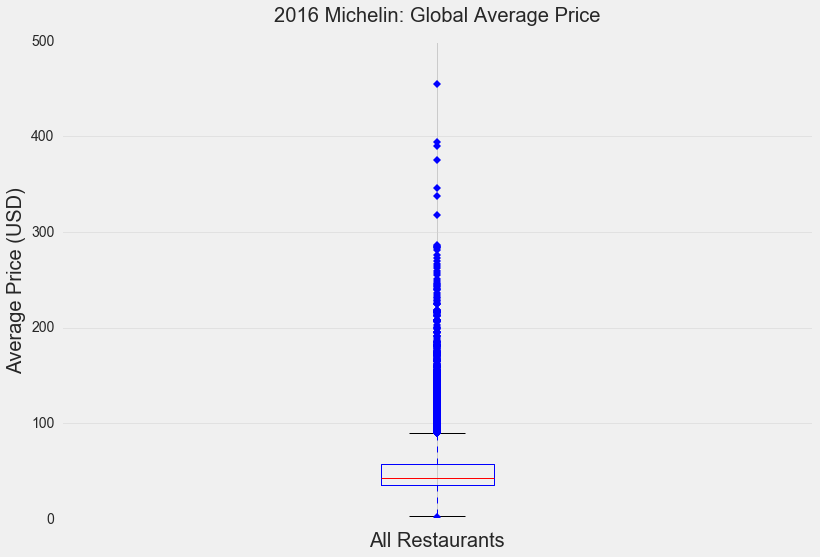

In [141]:
plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust()

bp = plt.boxplot(df['avg_USD'], 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Global Average Price', y =1.03)
ax1.set_xlabel('All Restaurants', fontsize = 20)
ax1.set_ylabel('Average Price (USD)', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 1
ax1.set_xlim(0.5, numBoxes + 0.5)
#ax1.set_ylim(-10, 100)
xtickNames = plt.setp(ax1, xticklabels=[''])
plt.setp(xtickNames, fontsize=16)

plt.show()

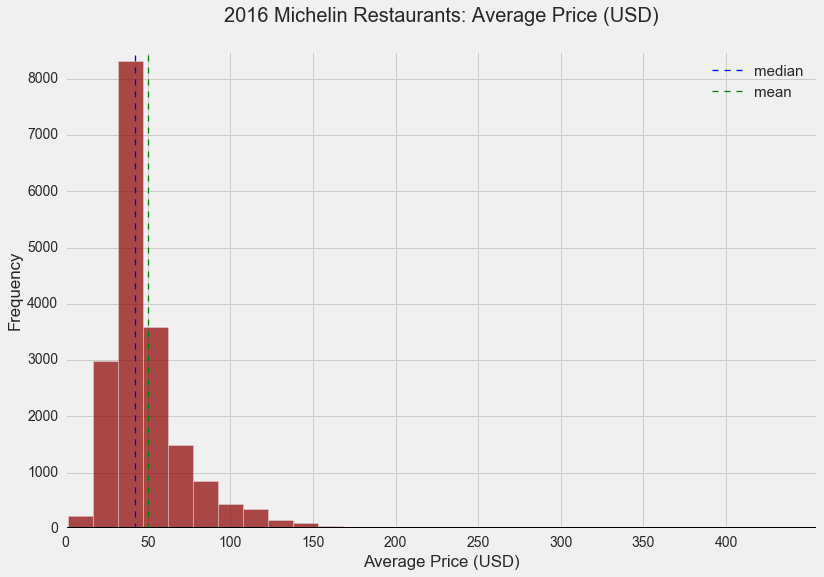

In [235]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_hist = plt.hist(df['avg_USD'], color = 'darkred', bins = 30, alpha = 0.7)
plt.axvline(df['avg_USD'].median(), color='b', linestyle='dashed', linewidth=1.3, \
            label = 'median')
plt.axvline(df['avg_USD'].mean(), color='g', linestyle='dashed', linewidth=1.3, \
            label = 'mean')
plt.axhline(0, color='black')
plt.title('2016 Michelin Restaurants: Average Price (USD)', fontsize = 20, y = 1.05)

# y label
plt.ylabel('Frequency')
plt.yticks(range(0, 8500, 1000))

# x label
plt.xlabel('Average Price (USD)')
plt.xticks(range(0, 450, 50))

plt.xlim([0, max(df['avg_USD'])])
plt.ylim([0, 8500])

plt.legend(loc='upper right', fontsize = 15)

plt.show()

In [199]:
df = pd.concat([df, pd.get_dummies(df['currency'])], axis = 1)

In [200]:
## mealtimes/prices, comments, address (use lat/lon in geopy instead), phone, email, website
count = 0
for i in df['add_info']:
    count += 1
    print 'index %s' %count
    print '======'
    for j in i:
        print j
    print '--------------\n'
    if count > 1:
        break

index 1
Lunch 20 €, Menu 32/56 € - Carte 45/58 €
Meals outside
Air conditioning
Enclosed car park
Address pl. du Foiral, 66230 Prats-de-Mollo-la-Preste
Phone +33468397248
Email info@hotel-le-bellevue.fr
Website: http://www.hotel-le-bellevue.fr
--------------

index 2
Lunch 21 €, Menu 28 € (weekdays), 38/60 € - Carte 36/62 €
booking advisable
Meals outside
Enclosed car park
Address 73 av. de l'Ermitage, 43000 Espaly-St-Marcel
Phone +33471040899
Email bruno.chartier@wanadoo.fr
--------------



Get a list of unique distinctions (stars must be counted!  'star' only appears once here, regardless of actual number of stars):

In [201]:
distinction_set = []
for i in range(len(df)):
    for j in df['distinctions'][i]:
        if j in distinction_set:
            continue
        else:
             distinction_set.append(j)
distinction_set

[['bib-gourmand'],
 ['standing-13'],
 ['assiette'],
 ['star'],
 ['standing-19'],
 ['standing-21'],
 ['standing-14'],
 ['standing-12'],
 ['standing-20'],
 ['good-value-menu'],
 ['standing-15'],
 ['standing-18'],
 ['standing-17'],
 ['standing-16']]

In [202]:
def distinctify(df):

    standing = []
    for i in range(len(df)):
        if ['standing-12'] in df['distinctions'][i]:
            standing.append(12)
        elif ['standing-13'] in df['distinctions'][i]:
            standing.append(13)
        elif ['standing-14'] in df['distinctions'][i]:
            standing.append(14)
        elif ['standing-15'] in df['distinctions'][i]:
            standing.append(15)
        elif ['standing-16'] in df['distinctions'][i]:
            standing.append(16)
        elif ['standing-17'] in df['distinctions'][i]:
            standing.append(17)
        elif ['standing-18'] in df['distinctions'][i]:
            standing.append(18)
        elif ['standing-19'] in df['distinctions'][i]:
            standing.append(19)
        elif ['standing-20'] in df['distinctions'][i]:
            standing.append(20)
        elif ['standing-21'] in df['distinctions'][i]:
            standing.append(21)
        elif ['standing-22'] in df['distinctions'][i]:
            standing.append(22)
        else:
            standing.append(None)

    df['standing'] = standing
    del standing



    bib = []
    for i in range(len(df)):
        if ['bib-gourmand'] in df['distinctions'][i]:
            bib.append(1)
        else:
            bib.append(0)

    df['bib'] = bib
    del bib


    stars = []
    for i in range(len(df)):
        star_count = 0
        for starlet in df['distinctions'][i]:
            if starlet == ['star']:
                star_count += 1
        stars.append(star_count)

    df['stars'] = stars
    del stars
    
    df['included'] = 0
    df['included'][(df['stars'] == 0) & (df['bib'] == 0)] = 1
    df['included'].value_counts()

    assiette = []
    for i in range(len(df)):
        if ['assiette'] in df['distinctions'][i]:
            assiette.append(1)
        else:
            assiette.append(0)

    df['assiette'] = assiette
    del assiette

    value_menu = []
    for i in range(len(df)):
        if ['good-value-menu'] in df['distinctions'][i]:
            value_menu.append(1)
        else:
            value_menu.append(0)

    df['value_menu'] = value_menu
    del value_menu
    
    del df['distinctions']
    
    three_star = [0]*len(df)
    two_star = [0]*len(df)
    one_star = [0]*len(df)
    for i in range(len(df)):
        if df['stars'][i] == 3:
            three_star[i] = 1
        elif df['stars'][i] == 2:
            two_star[i] = 1
        elif df['stars'][i] == 1:
            one_star[i] = 1
        else:
            continue
            
    df['three_star'] = three_star
    df['two_star'] = two_star
    df['one_star'] = one_star
            
    del three_star
    del two_star
    del one_star          
    
    return df

In [203]:
df = distinctify(df)
df.columns

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index([u'name', u'cuisine', u'blurb', u'num_words', u'high_price',
       u'low_price', u'currency', u'photos', u'photo_count', u'add_info',
       u'latitude', u'longitude', u'old-ie.js', u'english+french-',
       u'span class=wine', u'avg_USD', u'BRL', u'CHF', u'CZK', u'DKK', u'EUR',
       u'GBP', u'HKD', u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD', u'USD',
       u'standing', u'bib', u'stars', u'included', u'assiette', u'value_menu',
       u'three_star', u'two_star', u'one_star'],
      dtype='object')

In [206]:
print df['one_star'].value_counts()
print df['two_star'].value_counts()
print df['three_star'].value_counts()

0    16794
1     1867
Name: one_star, dtype: int64
0    18345
1      316
Name: two_star, dtype: int64
0    18574
1       87
Name: three_star, dtype: int64


Assiette and plain inclusion in the Guide are distinct... distinctions, as shown in these value counts:

In [207]:
print df['assiette'].value_counts()
print df['included'].value_counts()

0    15636
1     3025
Name: assiette, dtype: int64
1    13713
0     4948
Name: included, dtype: int64


In [208]:
name_len = []
for i in range(len(df)):
    name = df['name'][i]
    length = len(name)
    name_len.append(length)
    
df['name_len'] = name_len

In [209]:
df.columns

Index([u'name', u'cuisine', u'blurb', u'num_words', u'high_price',
       u'low_price', u'currency', u'photos', u'photo_count', u'add_info',
       u'latitude', u'longitude', u'old-ie.js', u'english+french-',
       u'span class=wine', u'avg_USD', u'BRL', u'CHF', u'CZK', u'DKK', u'EUR',
       u'GBP', u'HKD', u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD', u'USD',
       u'standing', u'bib', u'stars', u'included', u'assiette', u'value_menu',
       u'three_star', u'two_star', u'one_star', u'name_len'],
      dtype='object')

In [210]:
x = ['name', 'cuisine', 'blurb', 'currency', 'photos', 'add_info', 'high_price', 'low_price', \
     'num_words', 'photo_count', 'latitude', 'longitude', 'name_len', 'avg_USD', 'standing', \
     'stars', 'included', 'bib', 'three_star', 'two_star', 'one_star', 'assiette', \
     'value_menu', 'BRL', 'CHF', 'CZK', 'DKK', 'EUR', 'GBP', 'HKD', 'HUF', 'MOP', 'NOK', \
     'PLN', 'SEK', 'SGD', 'USD', 'span class=wine', 'english+french-','old-ie.js']

if len(df.columns) == len(x):
    df = df[x]
else:
    print 'length mismatch'

A jitter function:

In [211]:
def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    

Color assignments according to distinction:

In [212]:
distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))

Dataframe subsets according to distinction:

In [214]:
df_incl = df[df['included'] == 1]
df_bib = df[(df['bib'] == 1)]
df_1 = df[(df['stars'] == 1)]
df_2 = df[(df['stars'] == 2)]
df_3 = df[(df['stars'] == 3)]

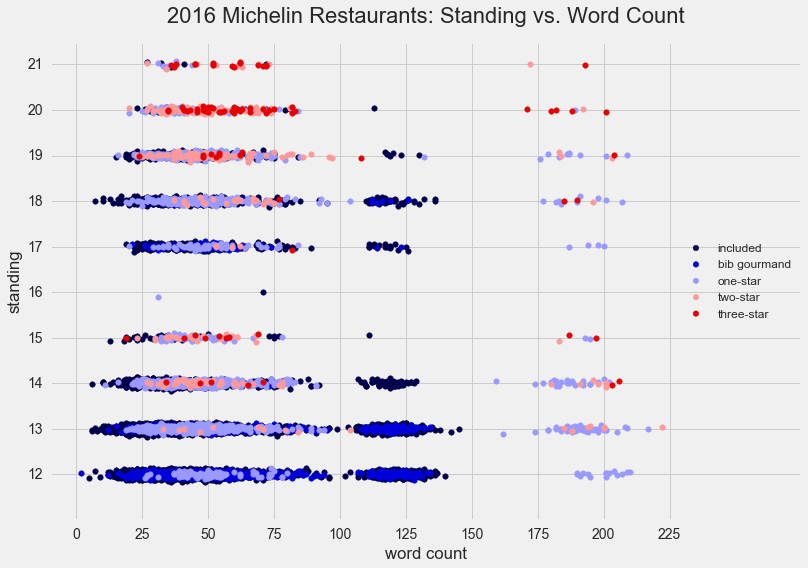

In [221]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(df_incl['num_words'], rand_jitter(df_incl['standing']), \
            color = distinction_colors[0], alpha = 1, s = 30, label = 'included')

plt.scatter(df_bib['num_words'], rand_jitter(df_bib['standing']), \
            color = distinction_colors[1], alpha = 1, s = 30, label = 'bib gourmand')

plt.scatter(df_1['num_words'], rand_jitter(df_1['standing']), \
            color = distinction_colors[2], alpha = 1, s = 30, label = 'one-star')

plt.scatter(df_2['num_words'], rand_jitter(df_2['standing']), \
            color = distinction_colors[3], alpha = 1, s = 30, label = 'two-star')

plt.scatter(df_3['num_words'], rand_jitter(df_3['standing']), \
            color = distinction_colors[4], alpha = 1, s = 30, label = 'three-star')


plt.title('2016 Michelin Restaurants: Standing vs. Word Count', fontsize = 22, y = 1.03)

# y label
plt.ylabel('standing')
plt.yticks(range(12, 22))

# x label
plt.xlabel('word count')
plt.xticks(range(0, 250, 25))

# set the figure boundaries
plt.ylim([11, 21.5])
plt.xlim([-10, 275])
plt.grid(True)
plt.legend(loc='center right', fontsize = 12)

plt.show()

In [218]:
df[(df['stars'] == 3) & (df['standing'] == 17)][['name', 'currency', 'standing', 'cuisine']]

,name,currency,standing,cuisine
10008,Sushi Shikon,HKD,17.0,Sushi


In [225]:
df[(df['stars'] == 1) & (df['num_words'] > 125) & (df['num_words'] < 150)][['name', \
                                                        'currency', 'standing', 'cuisine']]

,name,currency,standing,cuisine
15913,Gasthaus Zum Gupf,CHF,19.0,French classic


Trying to plot broken y-axis, not working yet... skip for now

In [226]:
# plt.figure(figsize=(12,8))
# plt.style.use('fivethirtyeight')

# # df_price = df.sort('avg_USD', ascending = True, inplace = False)
# # df_price = df_price.reset_index(drop = True)

# cm_args = []
# price_color = []

# max_avg = max(df[df['avg_USD'] < 200]['avg_USD'])
# min_avg = min(df['avg_USD'])

# count = 0
# for i in df[df['avg_USD'] < 200]['avg_USD']:
#     cm_arg = (i-min_avg)*256/(max_avg - min_avg)
#     cm_args.append(cm_arg)
#     lil_color = cm.coolwarm(cm_arg)
#     if count < 10:
#         print cm_arg
#         count += 1
#     price_color.append(lil_color)
    

# def rand_jitter(arr):
#     stdev = .005*(max(arr)-min(arr))
#     return arr + np.random.randn(len(arr)) * stdev    
    
# plt.scatter(rand_jitter(df['num_words']), rand_jitter(df['standing']), \
#             color = price_color, alpha = 0.5, s = 20)


# plt.title('2016 Michelin Restaurants: Standing vs. Word Count', fontsize = 22, y = 1.03)

# # y label
# plt.ylabel('standing')

# # x label
# plt.xlabel('word count')

# # set the figure boundaries
# plt.ylim([11, 22])
# plt.xlim([-10, 250])
# plt.grid(True)
# #plt.legend(loc='center right', fontsize = 10)

# plt.show()

In [227]:
# plt.figure(figsize=(12,8))
# plt.style.use('fivethirtyeight')

# df_hist = plt.hist(cm_args, color = 'darkred', bins = 30, alpha = 0.7)
# # plt.axvline(cm_args.median(), color='b', linestyle='dashed', linewidth=1.3, label = 'median')
# # plt.axvline(df['avg_USD'].mean(), color='g', linestyle='dashed', linewidth=1.3, label = 'mean')
# plt.axhline(0, color='black')
# plt.title('2016 Michelin: Average Price (USD)', fontsize = 20, y = 1.05)

# # y label
# plt.ylabel('Frequency')

# # x label
# plt.xlabel('Average Price (USD)')

# # plt.xlim([0, max(df['avg_USD'])])
# # plt.ylim([0, 9000])

# plt.legend(loc='upper right', fontsize = 15)

# plt.show()

What's with so few restaurants having standing of 16?  Two in the whole world??

In [236]:
df[df['standing'] == 16][['name', 'currency', 'stars']]

,name,currency,stars
1144,Laurent,EUR,1
16333,Lai Heen,MOP,0


Color assignments according to currency:

In [246]:
conversion_rate_keys = [
 'EUR',
 'GBP',
 'USD',
 'CHF',
 'HKD',
 'BRL',
 'SGD',
 'SEK',
 'DKK',
 'MOP',
 'PLN',
 'NOK',
 'CZK',
 'HUF']

In [248]:
currency_colors = []
for i in range(0, 256, 256/14):
    currency_colors.append(cm.Set1(i))

currency_dict = dict(zip(conversion_rate_keys, currency_colors)) 

del currency_colors

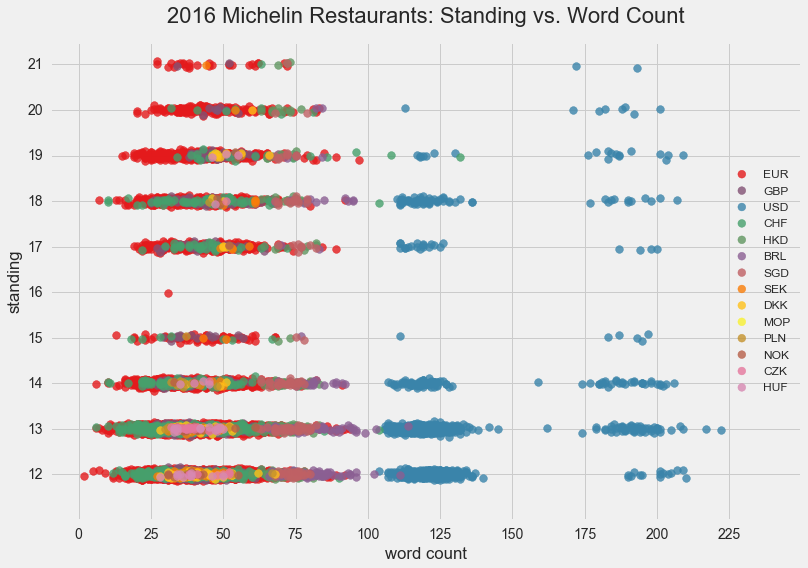

In [254]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

for i in conversion_rate_keys:
    
    plt.scatter(df[df['currency'] == i]['num_words'], \
                rand_jitter(df[df['currency'] == i]['standing']), \
                color = currency_dict[i], alpha = 0.8, s = 60, \
                label = i)

plt.title('2016 Michelin Restaurants: Standing vs. Word Count', fontsize = 22, y = 1.03)

# y label
plt.ylabel('standing')
plt.yticks(range(12, 22))

# x label
plt.xlabel('word count')
plt.xticks(range(0, 250, 25))

# set the figure boundaries
plt.ylim([11, 21.5])
plt.xlim([-10, 250])
plt.grid(True)
plt.legend(loc='center right', fontsize = 12)

plt.show()

Which restaurants are not in the United States and have more than 100 words in the review?

In [256]:
df[(df['currency'] != 'USD') & (df['num_words'] > 100)]\
[['name', 'cuisine', 'num_words', 'currency', 'avg_USD']].sort_values(by = 'avg_USD', \
                                                                      ascending = True)

,name,cuisine,num_words,currency,avg_USD
10220,Zena Caffè,Italian,111,BRL,34.41
10148,ChefVivi,modern,102,BRL,41.23
10202,Giuseppe Grill - Centro,Traditional,114,BRL,42.94
10119,El Tranvía,meats and grills,103,BRL,43.09
15925,Segreto,Creative,104,CHF,100.88
15913,Gasthaus Zum Gupf,French classic,132,CHF,125.84
15921,Homann's Restaurant,Créative| classique,104,CHF,206.96
15770,Schauenstein,Creative,108,CHF,232.44


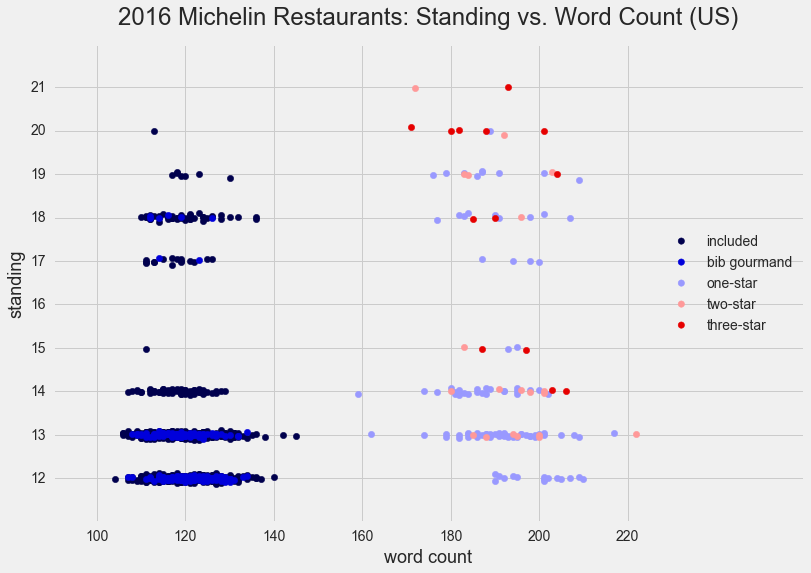

In [281]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_incl_USD = df_incl[df_incl['currency'] == 'USD']
df_bib_USD = df_bib[df_bib['currency'] == 'USD']
df_1_USD = df_1[df_1['currency'] == 'USD']
df_2_USD = df_2[df_2['currency'] == 'USD']
df_3_USD = df_3[df_3['currency'] == 'USD']

plt.scatter(df_incl_USD['num_words'], rand_jitter(df_incl_USD['standing']), \
            color = distinction_colors[0], alpha = 1, s = 40, label = 'included')

plt.scatter(df_bib_USD['num_words'], rand_jitter(df_bib_USD['standing']), \
            color = distinction_colors[1], alpha = 1, s = 40, label = 'bib gourmand')

plt.scatter(df_1_USD['num_words'], rand_jitter(df_1_USD['standing']), \
            color = distinction_colors[2], alpha = 1, s = 40, label = 'one-star')

plt.scatter(df_2_USD['num_words'], rand_jitter(df_2_USD['standing']), \
            color = distinction_colors[3], alpha = 1, s = 40, label = 'two-star')

plt.scatter(df_3_USD['num_words'], rand_jitter(df_3_USD['standing']), \
            color = distinction_colors[4], alpha = 1, s = 40, label = 'three-star')


plt.title('2016 Michelin Restaurants: Standing vs. Word Count (US)', fontsize = 24, y = 1.03)

# y label
plt.ylabel('standing', fontsize = 18)
plt.yticks(range(12, 22, 1))

# x label
plt.xlabel('word count', fontsize = 18)
plt.xticks(range(100, 235, 20))

# set the figure boundaries
plt.ylim([11, 22])
plt.xlim([90, 260])
plt.grid(True)
plt.legend(loc='center right', fontsize = 14)

plt.show()

Three-starred restaurants in the U.S. (NB all have male chefs):

In [284]:
df_3_USD[['name', 'cuisine', 'avg_USD', 'standing']]

,name,cuisine,avg_USD,standing
11762,Eleven Madison Park,Contemporary,112.5,15.0
11793,Le Bernardin,Seafood,112.5,20.0
11798,Per Se,Contemporary,112.5,21.0
11814,Masa,Japanese,112.5,18.0
11844,Jean-Georges,Contemporary,112.5,20.0
11961,The French Laundry,Contemporary,112.5,20.0
11983,Manresa,Contemporary,112.5,14.0
12025,The Restaurant at Meadowood,Contemporary,112.5,20.0
12237,Alinea,Contemporary,112.5,15.0
12364,Chef's Table at Brooklyn Fare,Contemporary,112.5,18.0


In [285]:
df['avg_USD'].describe()

count    18661.000000
mean        49.836614
std         27.068855
min          1.950000
25%         35.160000
50%         42.250000
75%         56.960000
max        455.000000
Name: avg_USD, dtype: float64

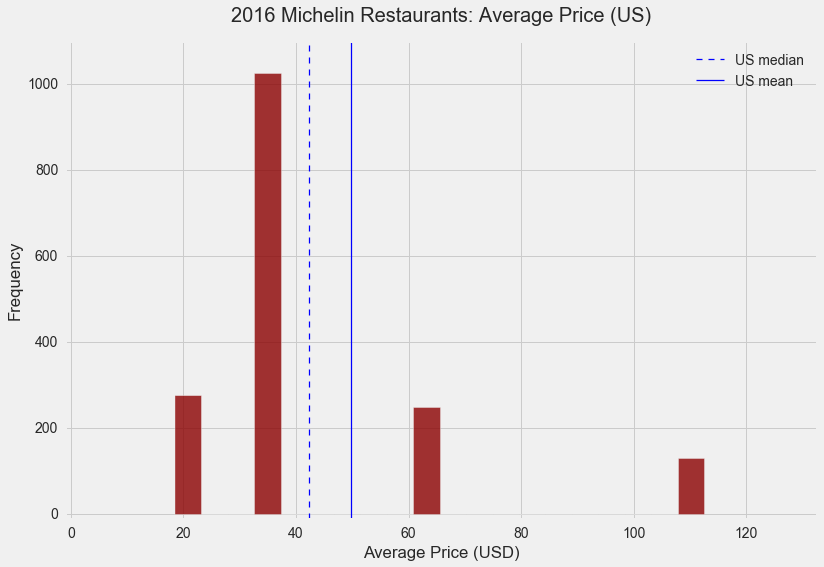

In [310]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(df_USD['avg_USD'], color = 'darkred', alpha = 0.8, bins = 20)
plt.axvline(df['avg_USD'].median(), color='b', linestyle='dashed', linewidth=1.25, \
            label = 'US median')
plt.axvline(df['avg_USD'].mean(), color='b', linestyle='solid', linewidth=1.25, \
            label = 'US mean')

plt.title('2016 Michelin Restaurants: Average Price (US)', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Frequency')
plt.yticks(range(0, 1110, 200))

# x label
plt.xlabel('Average Price (USD)')

plt.xlim([-1, max(df_USD['avg_USD']) + 20])
plt.ylim([-10, 1100])

plt.legend(loc='upper right', fontsize = 14)

plt.show()

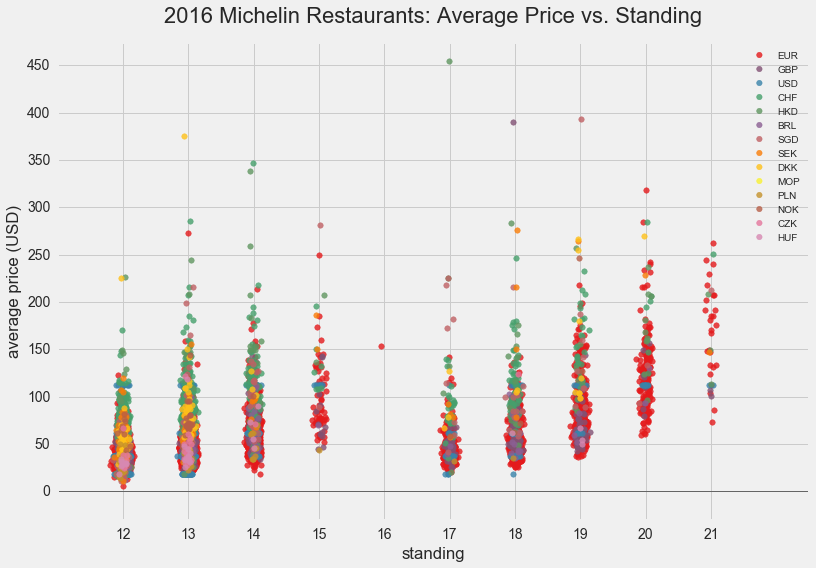

In [322]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

for i in conversion_rate_keys:
    
    plt.scatter(rand_jitter(df[df['currency'] == i]['standing']), \
                df[df['currency'] == i]['avg_USD'], \
                color = currency_dict[i], alpha = 0.8, s = 30, \
                label = i)
    
plt.title('2016 Michelin Restaurants: Average Price vs. Standing', fontsize = 22, \
          y = 1.03)

# y label
plt.ylabel('average price (USD)')
plt.yticks(range(0, 550, 50))

# x label
plt.xlabel('standing')
plt.xticks(range(12, 22))

# set the figure boundaries
plt.ylim([-30, 475])
plt.xlim([11, 22.5])
plt.axhline(0, color='black', linestyle='solid', linewidth=1, alpha = 0.5)
plt.grid(True)
plt.legend(loc='upper right', fontsize = 10)

plt.show()

Most-expensive Michelin restaurants, world-wide:

In [323]:
df[df['avg_USD'] > 300][['name', 'cuisine', 'currency', 'stars', 'standing', 'avg_USD']]\
.sort_values(by = 'avg_USD', ascending = False)

,name,cuisine,currency,stars,standing,avg_USD
10008,Sushi Shikon,Sushi,HKD,3,17.0,455.00
17980,Waku Ghin,Japanese,SGD,1,19.0,393.75
14811,Araki,Japanese,GBP,2,18.0,390.00
7890,Alchemist,innovative,DKK,0,13.0,375.00
15977,Denis Martin,Creative,CHF,1,14.0,346.32
9849,Sun Tung Lok (Central),Cantonese,HKD,0,14.0,338.00
2657,Pierre Gagnaire pour les Airelles,Creative,EUR,2,20.0,318.18


In [90]:
# try this but with coloring for stars!!!!

# plt.figure(figsize=(12,8))
# plt.style.use('fivethirtyeight')

# currency_colors = []
# for i in range(0, 256, 256/14):
#     currency_colors.append(cm.Set1(i))

# currency_dict = dict(zip(conversion_rate.keys(), currency_colors))

# def rand_jitter(arr):
#     stdev = .005*(max(arr)-min(arr))
#     return arr + np.random.randn(len(arr)) * stdev    

 
# for i in range(len(currency_dfs)):
    
#     plt.scatter(rand_jitter(currency_dfs[i]['avg_USD']), \
#                 rand_jitter(currency_dfs[i]['standing']), \
#                 color = currency_colors[i], alpha = 0.8, s = 10, \
#                 label = df['currency'].value_counts().index[i])
    
# plt.title('2016 Michelin Restaurants: Standing vs. Average Price (USD)', \
# fontsize = 22, y = 1.03)

# # y label
# plt.ylabel('standing')

# # x label
# plt.xlabel('average price (USD)')

# # set the figure boundaries
# plt.ylim([10, 22])
# plt.xlim([-20, 500])
# plt.grid(True)
# plt.legend(loc='lower right', fontsize = 10)

# plt.show()

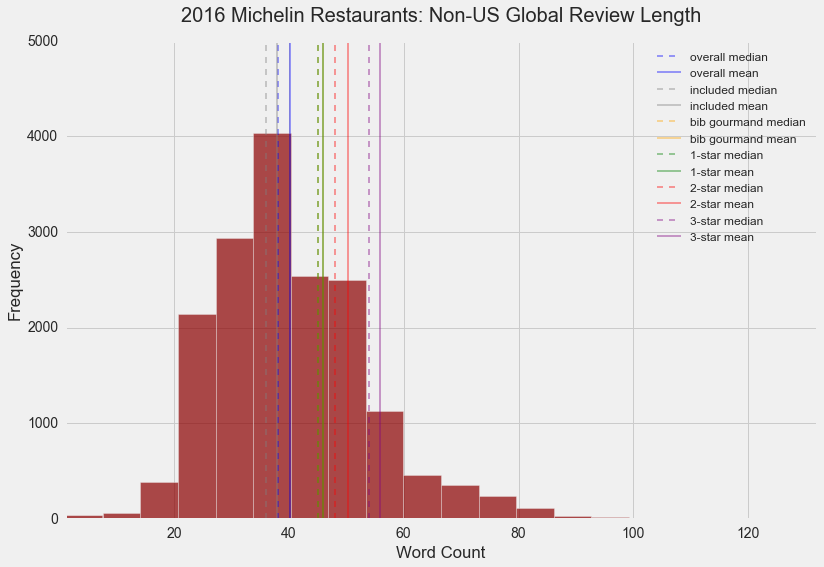

In [325]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_incl_notUSD = df_incl[df_incl['currency'] != 'USD']
df_bib_notUSD = df_bib[df_bib['currency'] != 'USD']
df_1_notUSD = df_1[df_1['currency'] != 'USD']
df_2_notUSD = df_2[df_2['currency'] != 'USD']
df_3_notUSD = df_3[df_3['currency'] != 'USD']

plt.hist(df[df['currency'] != 'USD']['num_words'], color = 'darkred', alpha = 0.7, bins = 20)
plt.axvline(df[df['currency'] != 'USD']['num_words'].median(), color='b', \
            linestyle='dashed', linewidth=1.5, label = 'overall median', alpha = 0.5)
plt.axvline(df[df['currency'] != 'USD']['num_words'].mean(), color='b', \
            linestyle='solid', linewidth=1.5, label = 'overall mean', alpha = 0.5)
plt.axvline(df_incl_notUSD['num_words'].median(), color='grey', linestyle='dashed', \
            linewidth=1.5, label = 'included median', alpha = 0.5)
plt.axvline(df_incl_notUSD['num_words'].mean(), color='grey', linestyle='solid', \
            linewidth=1.5, label = 'included mean', alpha = 0.5)
plt.axvline(df_bib_notUSD['num_words'].median(), color='orange', linestyle='dashed', \
            linewidth=1.5, label = 'bib gourmand median', alpha = 0.5)
plt.axvline(df_bib_notUSD['num_words'].mean(), color='orange', linestyle='solid', \
            linewidth=1.5, label = 'bib gourmand mean', alpha = 0.5)
plt.axvline(df_1_notUSD['num_words'].median(), color='g', linestyle='dashed', \
            linewidth=1.5, label = '1-star median', alpha = 0.5)
plt.axvline(df_1_notUSD['num_words'].mean(), color='g', linestyle='solid', \
            linewidth=1.5, label = '1-star mean', alpha = 0.5)
plt.axvline(df_2_notUSD['num_words'].median(), color='r', linestyle='dashed', \
            linewidth=1.5, label = '2-star median', alpha = 0.5)
plt.axvline(df_2_notUSD['num_words'].mean(), color='r', linestyle='solid', \
            linewidth=1.5, \
            label = '2-star mean', alpha = 0.5)
plt.axvline(df_3_notUSD['num_words'].median(), color='purple', linestyle='dashed', \
            linewidth=1.5, label = '3-star median', alpha = 0.5)
plt.axvline(df_3_notUSD['num_words'].mean(), color='purple', linestyle='solid', \
            linewidth=1.5, label = '3-star mean', alpha = 0.5)

plt.title('2016 Michelin Restaurants: Non-US Global Review Length', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('Word Count')

plt.xlim([min(df[df['currency'] != 'USD']['num_words']), \
          max(df[df['currency'] != 'USD']['num_words'])])
plt.ylim([0, 5000])

plt.legend(loc='upper right', fontsize = 12)

plt.show()

Median and mean lines for bib gourmand and 1-star word counts are visually overlaid above; statistics confirmed as distinct below: 

In [326]:
print 'bib gourmand:'
print df_bib_notUSD['num_words'].describe()
print '\n1-star:'
print df_1_notUSD['num_words'].describe()

bib gourmand:
count    2413.000000
mean       45.929963
std        13.080583
min         2.000000
25%        37.000000
50%        45.000000
75%        53.000000
max       111.000000
Name: num_words, dtype: float64

1-star:
count    1755.000000
mean       45.972650
std        12.944815
min        11.000000
25%        38.000000
50%        45.000000
75%        53.000000
max       132.000000
Name: num_words, dtype: float64


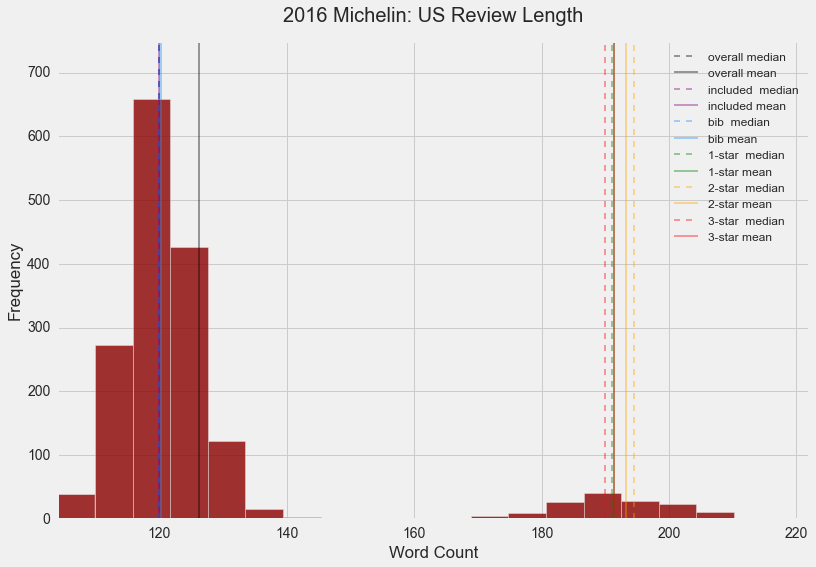

In [328]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.hist(df_USD['num_words'], color = 'darkred', alpha = 0.8, bins = 20)
plt.axvline(df_USD['num_words'].median(), color='black', linestyle='dashed', \
            linewidth=1.5, label = 'overall median', alpha = 0.5)
plt.axvline(df_USD['num_words'].mean(), color='black', linestyle='solid', linewidth=1.5, \
            label = 'overall mean', alpha = 0.5)
plt.axvline(df_incl_USD['num_words'].median(), color='purple', linestyle='dashed', \
            linewidth=1.5, label = 'included  median', alpha = 0.5)
plt.axvline(df_incl_USD['num_words'].mean(), color='purple', linestyle='solid', \
            linewidth=1.5, label = 'included mean', alpha = 0.5)
plt.axvline(df_bib_USD['num_words'].median(), color='dodgerblue', linestyle='dashed', \
            linewidth=1.5, label = 'bib  median', alpha = 0.5)
plt.axvline(df_bib_USD['num_words'].mean(), color='dodgerblue', linestyle='solid', \
            linewidth=1.5, label = 'bib mean', alpha = 0.5)
plt.axvline(df_1_USD['num_words'].median(), color='green', linestyle='dashed', \
            linewidth=1.5, label = '1-star  median', alpha = 0.5)
plt.axvline(df_1_USD['num_words'].mean(), color='green', linestyle='solid', \
            linewidth=1.5, label = '1-star mean', alpha = 0.5)
plt.axvline(df_2_USD['num_words'].median(), color='orange', linestyle='dashed', \
            linewidth=1.5, label = '2-star  median', alpha = 0.5)
plt.axvline(df_2_USD['num_words'].mean(), color='orange', linestyle='solid', \
            linewidth=1.5, label = '2-star mean', alpha = 0.5)
plt.axvline(df_3_USD['num_words'].median(), color='r', linestyle='dashed', \
            linewidth=1.5, label = '3-star  median', alpha = 0.5)
plt.axvline(df_3_USD['num_words'].mean(), color='r', linestyle='solid', \
            linewidth=1.5, label = '3-star mean', alpha = 0.5)


plt.title('2016 Michelin: US Review Length', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('Word Count')

plt.xlim([min(df_USD['num_words']), max(df_USD['num_words'])])
plt.ylim([0, 750])

plt.legend(loc='upper right', fontsize = 12)

plt.show()

Change 'n' below to return observations with 'add_info' length n:

In [329]:
n = 14

info_len = []

print 'index of observation with add_info length %s:\n' %n
for i in range(len(df)):
    length = len(df['add_info'][i])
    if length == n:
        print i
    elif length in distinction_set:
        continue
    else:
         info_len.append(length)
            
print '\nin addition to length %s, ' %n + 'there are add_info of lengths: %s' \
%list(set(info_len))

index of observation with add_info length 14:

390
613
867
1298
1525
2604
2638
4152
4222
5822
6992

in addition to length 14, there are add_info of lengths: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]


Inspect a bunch of these and make a function to dummify amenities:

In [330]:
df['add_info'][6992]

['Menu 85/130 \xe2\x82\xac - Carte 69/112 \xe2\x82\xac',
 'dinner only',
 'A particularly interesting wine list',
 'Interesting or extensive view',
 'Park or Garden',
 'Meals outside',
 'Tennis',
 'Air conditioning',
 'No dogs allowed',
 'Private dining rooms',
 'Address via Santa Chiara 26, 84010 RAVELLO',
 'Phone +39089857459',
 'Email ristorante@villacimbrone.com',
 'Website: http://www.villacimbrone.com']

In [331]:
def cleaner_restaurant(df):
    
    wine = []
    view = []
    garden = []
    dinner_tasting = []
    dinner_only = []
    lunch_only = []
    outside_dining = []
    air_conditioning = []
    no_dogs = []
    parking = []
    wheelchair = []
    private_dining = []
    with_rooms = []
    booking = []
    tennis = []
    valet = []

    for i in range(len(df)):
        name = df['name'][i]
        info_listlet = df['add_info'][i]
    
        ## WINE
        if 'A particularly interesting wine list' in info_listlet:
            wine.append(1)
        else:
            wine.append(0)
    
        ## VIEW
        if 'Interesting or extensive view' in info_listlet:
            view.append(1)
        else:
            view.append(0)

        ## PARK OR GARDEN
        if 'Park or Garden' in info_listlet:
            garden.append(1)
        else:
            garden.append(0)

        ## DINNER TASTING MENU ONLY
        if 'dinner only - set menu only' in info_listlet:
            dinner_tasting.append(1)
        else:
            dinner_tasting.append(0)

        ## MEALS OUTSIDE
        if 'Meals outside' in info_listlet:
            outside_dining.append(1)
        else:
            outside_dining.append(0)      

        ## AIR CONDITIONING
        if 'Air conditioning' in info_listlet:
            air_conditioning.append(1)
        else:
            air_conditioning.append(0) 

        ## NO DOGS
        if 'No dogs allowed' in info_listlet:
            no_dogs.append(1)
        else:
            no_dogs.append(0)

        ## DINNER ONLY
        if 'dinner only - booking advisable' in info_listlet: 
            dinner_only.append(1)
        elif 'dinner only - set menu only' in info_listlet:
            dinner_only.append(1)
        else:
            if 'dinner only' in info_listlet:
                dinner_only.append(1)
            else:
                dinner_only.append(0)

        ## WHEELCHAIR ACCESSIBLE
        if 'Wheelchair accessible' in info_listlet:
            wheelchair.append(1)
        else:
            wheelchair.append(0)

        ## PARKING
        if 'Enclosed car park' in info_listlet:
            parking.append(1)
        elif 'Garage' in info_listlet:
            parking.append(1)
        elif 'Valet parking' in info_listlet:
            parking.append(1)
        else:
            parking.append(0)    

        ## PRIVATE DINING 
        if 'Private dining rooms' in info_listlet:
            private_dining.append(1)
        else:
            private_dining.append(0) 

        ## WITH ROOMS
        if 'With rooms' in info_listlet:
            with_rooms.append(1)
        elif 'avec chambre(s)' in info_listlet:
            with_rooms.append(1)
        else:
            with_rooms.append(0)

        ## BOOKING ADVISABLE
        if 'booking advisable' in info_listlet:
            booking.append(1)
        elif 'dinner only - booking advisable' in info_listlet:
            booking.append(1)
        else:
            booking.append(0)

        ## LUNCH ONLY
        if 'lunch only' in info_listlet:
            lunch_only.append(1)
        elif 'd\xc3\xa9jeuner seulement' in info_listlet:
            lunch_only.append(1)
        else:
            lunch_only.append(0)
            
        ## TENNIS
        if 'Tennis' in info_listlet:
            tennis.append(1)
        else:
            tennis.append(0)
            
        ## VALET
        if 'Valet parking' in info_listlet:
            valet.append(1)
        else:
            valet.append(0)
  
        ## MAKE SURE NO MISMATCHES IN LIST LENGTH    
        length_list = [len(wine), len(view), len(garden), len(dinner_tasting), \
                len(dinner_only), len(lunch_only), len(outside_dining), \
                len(air_conditioning), len(no_dogs), len(parking), len(wheelchair), \
                len(private_dining), len(with_rooms), len(booking), len(tennis), len(valet)]

        if len(set(length_list)) > 1:

            print '\n'
            print set(length_list)
            print 'Things got screwy near %s!\n' %name
            print 'wine: %s' %len(wine)
            print 'view: %s' %len(view)
            print 'garden: %s' %len(garden)
            print 'dinner_tasting: %s' %len(dinner_tasting)
            print 'dinner_only: %s' %len(dinner_only)
            print 'lunch_only: %s' %len(lunch_only)  
            print 'outside_dining: %s' %len(outside_dining)
            print 'air_conditioning: %s' %len(air_conditioning)
            print 'no_dogs: %s' %len(no_dogs)
            print 'parking: %s' %len(parking)
            print 'wheelchair: %s' %len(wheelchair)
            print 'private dining: %s' %len(private_dining)
            print 'with rooms: %s' %len(with_rooms)
            print 'booking: %s' %len(booking)
            print 'tennis: %s' %len(tennis)
            print 'valet: %s' %len(valet)
            break    
            os.system('say "Uh oh, column mismatch."')

        else:
            continue

    

    df['wine'] = wine
    df['view'] = view
    df['garden'] = garden
    df['outside_dining'] = outside_dining
    df['air_conditioning'] = air_conditioning
    df['no_dogs'] = no_dogs
    df['parking'] = parking
    df['dinner_only'] = dinner_only
    df['wheelchair'] = wheelchair
    df['private_dining'] = private_dining
    df['with_rooms'] = with_rooms
    df['booking'] = booking
    df['lunch_only'] = lunch_only
    df['tennis'] = tennis
    df['dinner_tasting'] = dinner_tasting
    df['valet'] = valet
    
    return df

In [333]:
df = cleaner_restaurant(df)

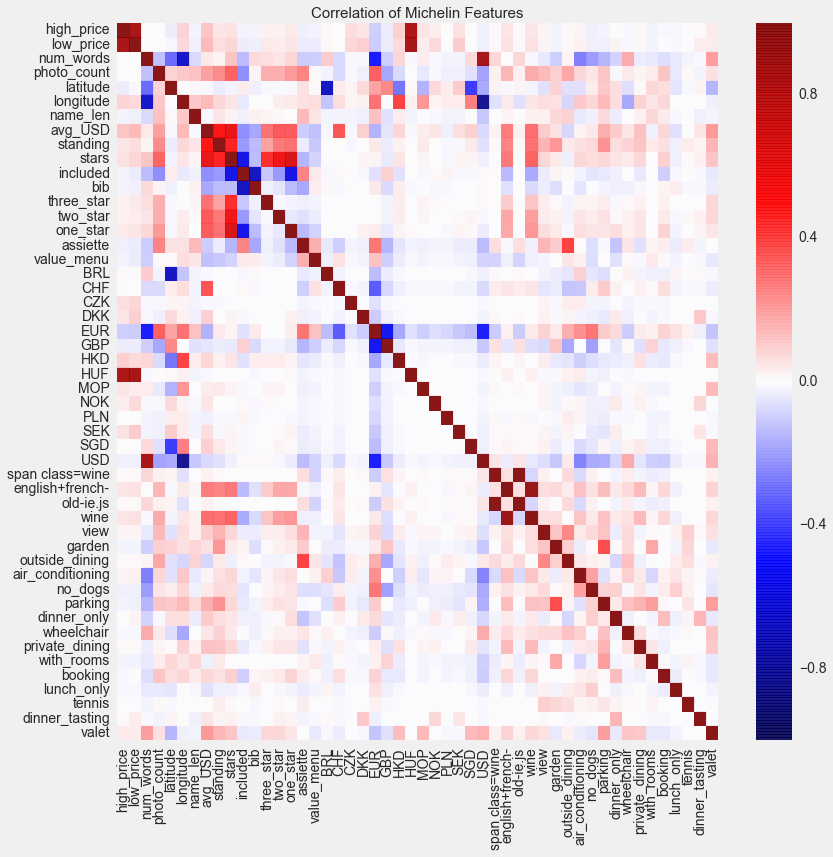

In [334]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.4)
ax = sns.heatmap(df.corr(), cmap = "seismic", alpha = 0.9)

ax.axes.set_title("Correlation of Michelin Features", size = 15)

plt.show()

Check permutations of four values in columns listed below:

In [335]:
big_check = []
for i in range(len(df)):
    lil_list = []
    lil_list.append(str(df['span class=wine'][i]) + str(df['english+french-'][i]) + \
                    str(df['old-ie.js'][i]) + str(df['wine'][i]))
    big_check.append(lil_list)

big_check = pd.DataFrame(big_check)
big_check[0].value_counts()

1010     15397
1111      2598
0000       310
1-110      204
0001       149
1110         3
Name: 0, dtype: int64

In [336]:
df.columns

Index([u'name', u'cuisine', u'blurb', u'currency', u'photos', u'add_info',
       u'high_price', u'low_price', u'num_words', u'photo_count', u'latitude',
       u'longitude', u'name_len', u'avg_USD', u'standing', u'stars',
       u'included', u'bib', u'three_star', u'two_star', u'one_star',
       u'assiette', u'value_menu', u'BRL', u'CHF', u'CZK', u'DKK', u'EUR',
       u'GBP', u'HKD', u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD', u'USD',
       u'span class=wine', u'english+french-', u'old-ie.js', u'wine', u'view',
       u'garden', u'outside_dining', u'air_conditioning', u'no_dogs',
       u'parking', u'dinner_only', u'wheelchair', u'private_dining',
       u'with_rooms', u'booking', u'lunch_only', u'tennis', u'dinner_tasting',
       u'valet'],
      dtype='object')

In [337]:
df = df[[u'name', u'cuisine', u'blurb', u'currency', u'photos', u'add_info',
       u'num_words', u'photo_count', u'latitude',
       u'longitude', u'name_len', u'avg_USD', u'standing', u'stars', u'bib',
       u'included', u'assiette', u'value_menu', u'BRL', u'CHF', u'CZK', u'DKK',
       u'EUR', u'GBP', u'HKD', u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD',
       u'USD', u'span class=wine', u'english+french-', u'old-ie.js', u'wine',
       u'view', u'garden', u'outside_dining', u'air_conditioning', u'no_dogs',
       u'parking', u'dinner_only', u'wheelchair', u'private_dining',
       u'with_rooms', u'booking', u'lunch_only', u'tennis', u'dinner_tasting',
       u'valet']]

df.columns[14]

'bib'

Proportion of restaurants having given feature:

In [338]:
df_proportions = df.ix[:,14:len(df.columns)].sum()/len(df)
df_proportions = pd.DataFrame(df_proportions)
df_proportions.sort(0, ascending = False)

/Users/Rebecca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,0
span class=wine,0.975403
old-ie.js,0.975403
included,0.734848
EUR,0.696908
air_conditioning,0.402979
parking,0.369755
private_dining,0.300573
wheelchair,0.250790
no_dogs,0.242270
outside_dining,0.221424


In [339]:
df[df['cuisine'] == ' grecque']

,name,cuisine,blurb,currency,photos,add_info,num_words,photo_count,latitude,longitude,...,parking,dinner_only,wheelchair,private_dining,with_rooms,booking,lunch_only,tennis,dinner_tasting,valet
3973,Athiri,grecque,"En hiver, installez-vous à l'intérieur, dans u...",EUR,[https://download.viamichelin.com/images/miche...,"[Menu 25 € - Carte 22/33 €, dîner seulement et...",57,5,37.9806,23.71688,...,0,0,0,0,0,0,0,0,0,0


In [340]:
df.isnull().sum()[0:15]

name             0
cuisine          2
blurb            0
currency         0
photos           0
add_info         0
num_words        0
photo_count      0
latitude         0
longitude        0
name_len         0
avg_USD          0
standing       874
stars            0
bib              0
dtype: int64

In [342]:
df[df['cuisine'].isnull()][['name', 'cuisine', 'blurb', 'currency', 'avg_USD']]

,name,cuisine,blurb,currency,avg_USD
17934,Lor 9 Beef Kway Teow,None,Beef Kway Teow is their very popular signature...,SGD,13.5
18008,Nasi Lemak Kukus,None,The flavoursome Nasi Lemak comes with a wide s...,SGD,4.5


In [343]:
## fill in the two Nones
df.ix[17934, 'cuisine'] = 'Singaporean'
df.ix[18008, 'cuisine'] = 'Singaporean'

## preliminary cuisine syntax clean
df['cuisine'] = df['cuisine'].apply(lambda x: x.lstrip())
df['cuisine'] = df['cuisine'].apply(lambda x: x.rstrip())

In [344]:
df.columns

Index([u'name', u'cuisine', u'blurb', u'currency', u'photos', u'add_info',
       u'num_words', u'photo_count', u'latitude', u'longitude', u'name_len',
       u'avg_USD', u'standing', u'stars', u'bib', u'included', u'assiette',
       u'value_menu', u'BRL', u'CHF', u'CZK', u'DKK', u'EUR', u'GBP', u'HKD',
       u'HUF', u'MOP', u'NOK', u'PLN', u'SEK', u'SGD', u'USD',
       u'span class=wine', u'english+french-', u'old-ie.js', u'wine', u'view',
       u'garden', u'outside_dining', u'air_conditioning', u'no_dogs',
       u'parking', u'dinner_only', u'wheelchair', u'private_dining',
       u'with_rooms', u'booking', u'lunch_only', u'tennis', u'dinner_tasting',
       u'valet'],
      dtype='object')

In [350]:
cuisinify(df)

In [351]:
df['new_cuisine'].value_counts()

modern              3779
traditional         2715
regional            1678
italian             1200
french              1154
fish_seafood        1038
international       1028
classic              964
creative             906
british              674
mediterranean        413
japanese             355
chinese              343
meats                290
american             264
SE_asian             195
spanish              191
sub_asian            161
contemporary         160
latin_american       152
terroir               97
asian                 94
market                79
street_food           64
swiss                 55
korean                50
fusion                47
greek                 44
middle_eastern        44
innovative            42
eastern_european      41
austrian              40
belgian               39
gastropub             38
portuguese            35
scandinavian          35
african               29
vegetarian_vegan      20
world                 16
danish                15


In [211]:
df[df['new_cuisine'] == 1]['cuisine'].value_counts()

Asian                               76
Andalusian                          13
Chinoise                             9
Classic |Fish and seafood            8
Andalouse                            3
Belgian|Classic                      3
Chinese|Modern                       2
Belge| classique                     2
Classic |French modern               2
Classic |Modern |Regional            2
Classic |Mediterranean|Asian         1
Belgian|Meats                        1
Belgian|French                       1
Asian influences|French creative     1
Classic |Piedmontese|Ligurian        1
Burgundian|French classic            1
Classic |French creative             1
Chinese|Cantonese|Asian              1
Classic |French|Traditional          1
Name: cuisine, dtype: int64

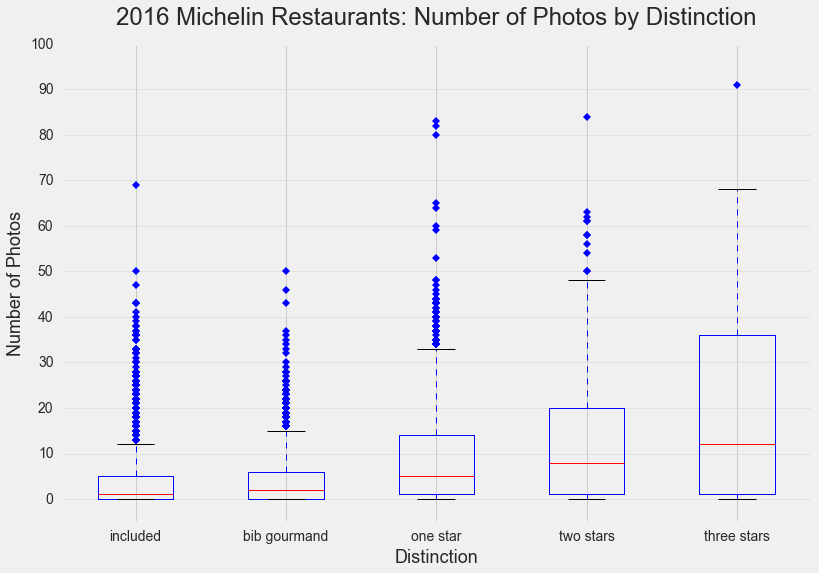

In [366]:
data = [df[df['included'] == 1]['photo_count'], 
        df[df['bib'] == 1]['photo_count'], 
        df[df['stars'] == 1]['photo_count'],
        df[df['stars'] == 2]['photo_count'],
        df[df['stars'] == 3]['photo_count']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust()

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Number of Photos by Distinction', y =1.03, \
              fontsize = 24)
ax1.set_xlabel('Distinction', fontsize = 18)
ax1.set_ylabel('Number of Photos', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-5, 100)
xtickNames = plt.setp(ax1, xticklabels=['included', 'bib gourmand', 'one star', \
                                        'two stars', 'three stars'])
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(0, 110, 10))

plt.show()

In [357]:
df[(df['stars'] == 2) & (df['photo_count'] > 80)][['name', 'cuisine', 'currency', 'stars']]

,name,cuisine,currency,stars
18148,Serge Vieira,Creative,EUR,2


In [358]:
df[(df['stars'] == 3) & (df['photo_count'] > 80)][['name', 'cuisine', 'currency', 'stars']]

,name,cuisine,currency,stars
876,Paul Bocuse,Classic,EUR,3
927,Flocons de Sel,Creative,EUR,3


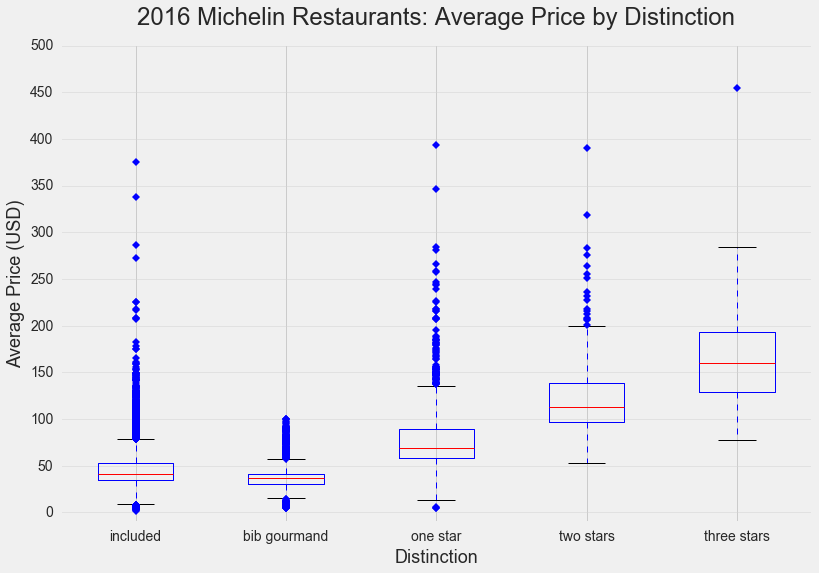

In [497]:
data = [df[df['included'] == 1]['avg_USD'], 
        df[df['bib'] == 1]['avg_USD'], 
        df[df['stars'] == 1]['avg_USD'],
        df[df['stars'] == 2]['avg_USD'],
        df[df['stars'] == 3]['avg_USD']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Average Price by Distinction', y = 1.03, \
              fontsize = 24)
ax1.set_xlabel('Distinction', fontsize = 18)
ax1.set_ylabel('Average Price (USD)', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-10, 502)
xtickNames = plt.setp(ax1, xticklabels=['included', 'bib gourmand', 'one star', \
                                        'two stars', 'three stars'])
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(0, 550, 50))

plt.show()

Over 300 USD for a 1-star meal:

In [367]:
df[(df['stars'] == 1) & (df['avg_USD'] > 300)][['name', 'cuisine', 'currency', 'avg_USD']]

,name,cuisine,currency,avg_USD
15977,Denis Martin,Creative,CHF,346.32
17980,Waku Ghin,Japanese,SGD,393.75


Over $250 for "included" (no bib, no stars):

In [369]:
df[(df['stars'] == 0) & (df['avg_USD'] > 250)][['name', 'cuisine', 'currency', 'avg_USD']]

,name,cuisine,currency,avg_USD
7890,Alchemist,innovative,DKK,375.00
9849,Sun Tung Lok (Central),Cantonese,HKD,338.00
15927,La Coupole/Matsuhisa,Asian,CHF,286.00
17114,Oblò,Poissons et fruits de mer,EUR,272.79


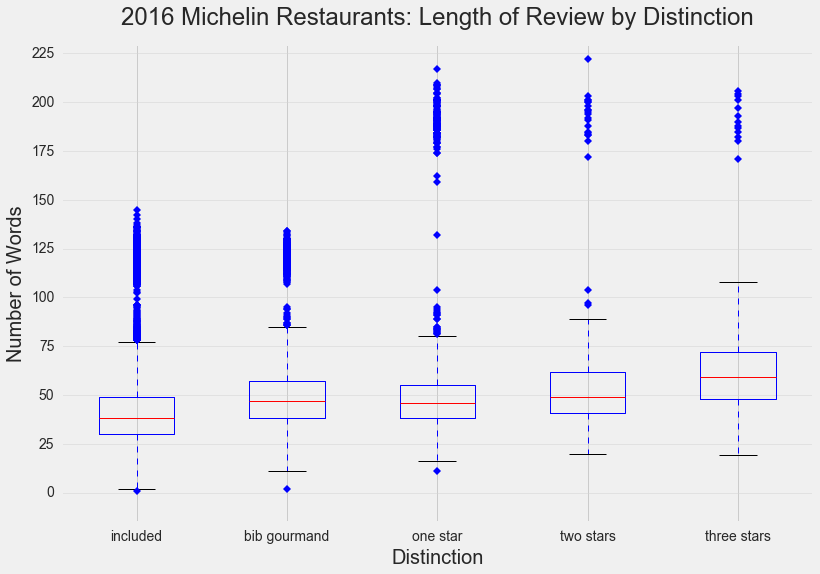

In [380]:
data = [df[df['included'] == 1]['num_words'], 
        df[df['bib'] == 1]['num_words'], 
        df[df['stars'] == 1]['num_words'],
        df[df['stars'] == 2]['num_words'],
        df[df['stars'] == 3]['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Length of Review by Distinction', y = 1.03, \
             fontsize = 24)
ax1.set_xlabel('Distinction', fontsize = 20)
ax1.set_ylabel('Number of Words', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-15, 230)
xtickNames = plt.setp(ax1, xticklabels=['included', 'bib gourmand', 'one star', \
                                        'two stars', 'three stars'])
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(0, 250, 25))

plt.show()

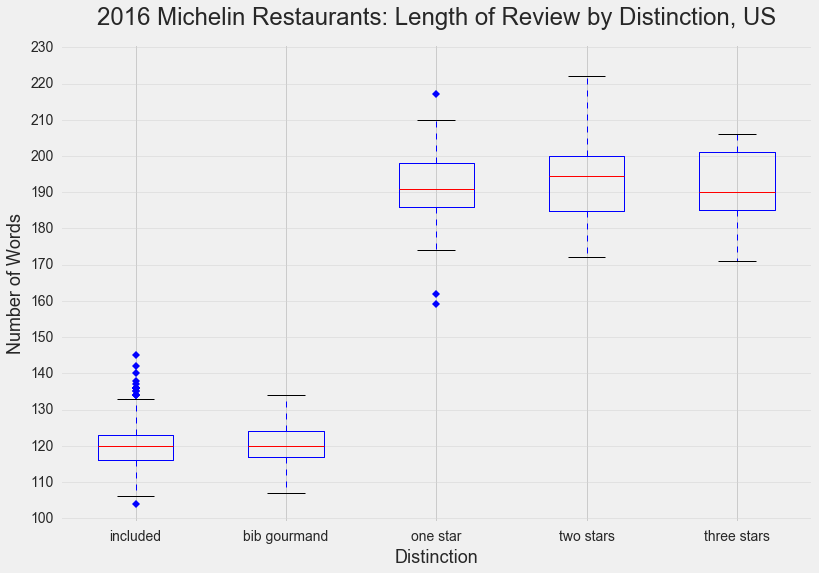

In [388]:
data = [df_incl_USD['num_words'], 
        df_bib_USD['num_words'], 
        df_1_USD['num_words'],
        df_2_USD['num_words'],
        df_3_USD['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Length of Review by Distinction, US', y =1.03, \
             fontsize = 24)
ax1.set_xlabel('Distinction', fontsize = 18)
ax1.set_ylabel('Number of Words', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(99, 231)
xtickNames = plt.setp(ax1, xticklabels=['included', 'bib gourmand', 'one star', \
                                        'two stars', 'three stars'])
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(100, 240, 10))

plt.show()

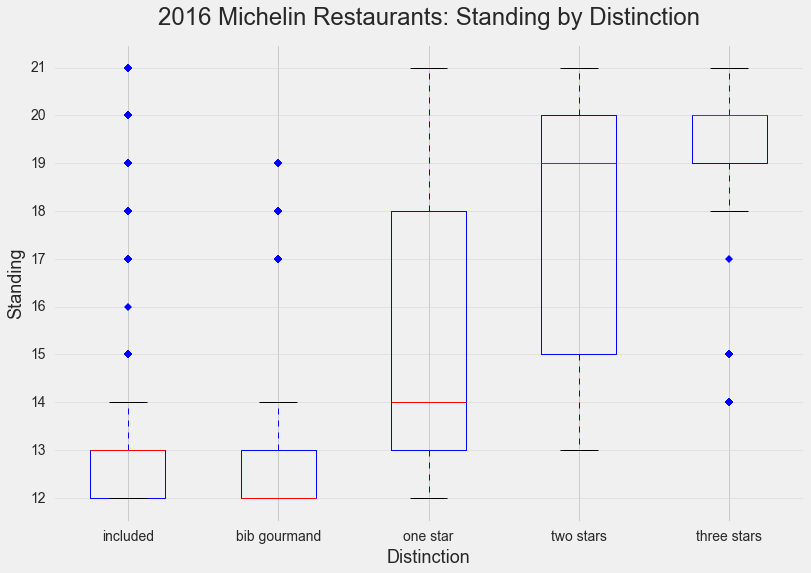

In [400]:
standing_data = df[pd.notnull(df['standing'])]
standing_data = [standing_data[standing_data['included'] == 1]['standing'], 
        standing_data[standing_data['bib'] == 1]['standing'], 
        standing_data[standing_data['stars'] == 1]['standing'],
        standing_data[standing_data['stars'] == 2]['standing'],
        standing_data[standing_data['stars'] == 3]['standing']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(standing_data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Standing by Distinction', y = 1.03, \
             fontsize = 24)
ax1.set_xlabel('Distinction', fontsize = 18)
ax1.set_ylabel('Standing', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(11.5, 21.5)
xtickNames = plt.setp(ax1, xticklabels=['included', 'bib gourmand', 'one star', \
                                        'two stars', 'three stars'])
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(12, 22, 1))

plt.show()

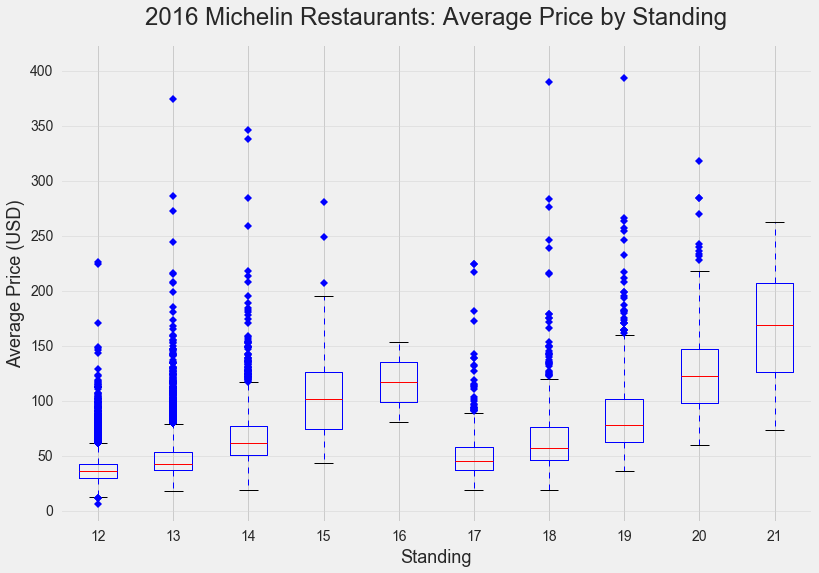

In [404]:
data = [df[df['standing'] == 12]['avg_USD'], 
        df[df['standing'] == 13]['avg_USD'], 
        df[df['standing'] == 14]['avg_USD'],
        df[df['standing'] == 15]['avg_USD'],
        df[df['standing'] == 16]['avg_USD'],
        df[df['standing'] == 17]['avg_USD'],
        df[df['standing'] == 18]['avg_USD'],
        df[df['standing'] == 19]['avg_USD'],
        df[df['standing'] == 20]['avg_USD'],
        df[df['standing'] == 21]['avg_USD']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Average Price by Standing', y = 1.03, fontsize = 24)
ax1.set_xlabel('Standing', fontsize = 18)
ax1.set_ylabel('Average Price (USD)', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-10, 425)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', \
                                        '20', '21'])
     
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(0, 450, 50))

plt.show()

In [415]:
df['currency'].value_counts().index

Index([u'EUR', u'GBP', u'USD', u'CHF', u'HKD', u'BRL', u'SGD', u'SEK', u'DKK',
       u'MOP', u'PLN', u'NOK', u'CZK', u'HUF'],
      dtype='object')

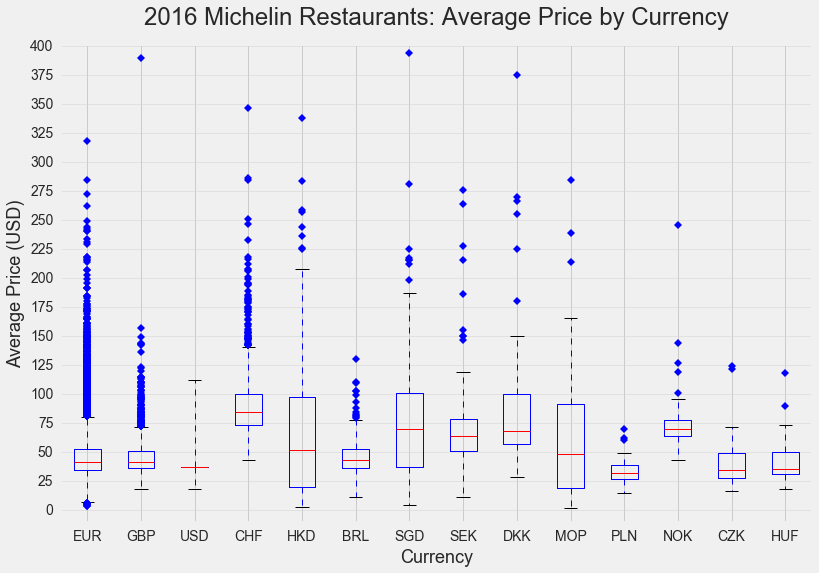

In [420]:
data = [df_EUR['avg_USD'], 
        df_GBP['avg_USD'], 
        df_USD['avg_USD'],
        df_CHF['avg_USD'],
        df_HKD['avg_USD'],
        df_BRL['avg_USD'],
        df_SGD['avg_USD'],
        df_SEK['avg_USD'],
        df_DKK['avg_USD'],
        df_MOP['avg_USD'],
        df_PLN['avg_USD'],
        df_NOK['avg_USD'],
        df_CZK['avg_USD'],
        df_HUF['avg_USD']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Average Price by Currency', y =1.03, fontsize = 24)
ax1.set_xlabel('Currency', fontsize = 18)
ax1.set_ylabel('Average Price (USD)', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = len(conversion_rate.keys())
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-10, 402)
xtickNames = plt.setp(ax1, xticklabels=df['currency'].value_counts().index)
     
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(0, 425, 25))

plt.show()

In [423]:
df_GBP[df_GBP['avg_USD'] > 200][['name', 'cuisine', 'avg_USD']]

,name,cuisine,avg_USD
14811,Araki,Japanese,390.0


In [424]:
df_NOK[df_NOK['avg_USD'] > 200][['name', 'cuisine', 'avg_USD']]

,name,cuisine,avg_USD
10274,Maaemo,innovative,246.0


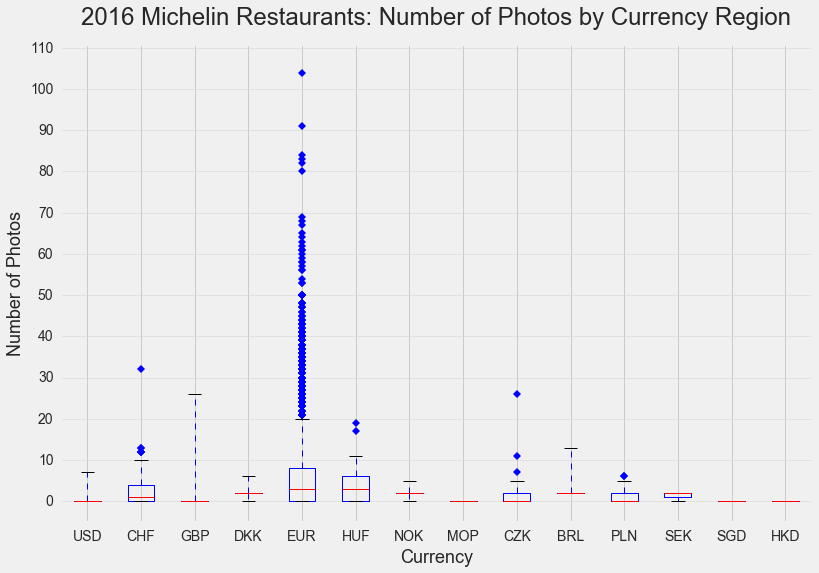

In [433]:
data = [df_USD['photo_count'], 
        df_CHF['photo_count'], 
        df_GBP['photo_count'],
        df_DKK['photo_count'],
        df_EUR['photo_count'],
        df_HUF['photo_count'],
        df_NOK['photo_count'],
        df_MOP['photo_count'],
        df_CZK['photo_count'],
        df_BRL['photo_count'],
        df_PLN['photo_count'],
        df_SEK['photo_count'],
        df_SGD['photo_count'],
        df_HKD['photo_count']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Number of Photos by Currency Region', y = 1.03, \
             fontsize = 24)
ax1.set_xlabel('Currency', fontsize = 18)
ax1.set_ylabel('Number of Photos', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = len(conversion_rate.keys())
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-5, 111)
xtickNames = plt.setp(ax1, xticklabels=conversion_rate.keys())
     
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(0, 120, 10))

plt.show()

In [438]:
df[df['photo_count'] > 100][['name', 'cuisine', 'photo_count', 'stars']]

,name,cuisine,photo_count,stars
927,Flocons de Sel,Creative,104,3


In [439]:
df_CHF[df_CHF['photo_count'] > 20][['name', 'cuisine', 'photo_count', 'stars']]

,name,cuisine,photo_count,stars
14576,Vivanda,Modern,32,1


In [440]:
df_CZK[df_CZK['photo_count'] > 20][['name', 'cuisine', 'photo_count', 'stars']]

,name,cuisine,photo_count,stars
3675,Alcron,modern,26,1


I can't.

In [441]:
Image(url= "https://download.viamichelin.com/media/image2/XL/7r/me/Ii/nLT96mtZbYvpUlNw.jpg")

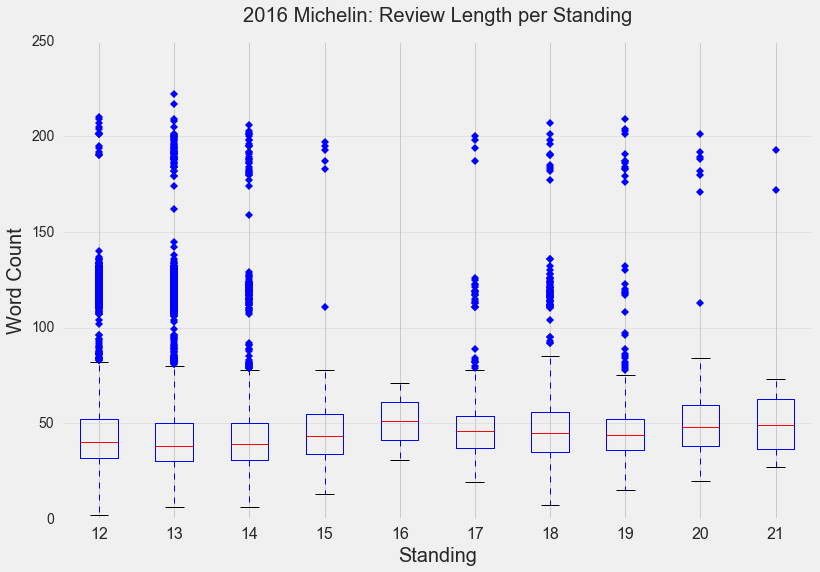

In [253]:
data = [df[df['standing'] == 12]['num_words'], 
        df[df['standing'] == 13]['num_words'], 
        df[df['standing'] == 14]['num_words'],
        df[df['standing'] == 15]['num_words'],
        df[df['standing'] == 16]['num_words'],
        df[df['standing'] == 17]['num_words'],
        df[df['standing'] == 18]['num_words'],
        df[df['standing'] == 19]['num_words'],
        df[df['standing'] == 20]['num_words'],
        df[df['standing'] == 21]['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: Review Length per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Word Count', fontsize = 20)

# Set the axes ranges and axes labels
# numBoxes = 5
# ax1.set_xlim(0.5, numBoxes + 0.5)
# ax1.set_ylim(90, 230)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

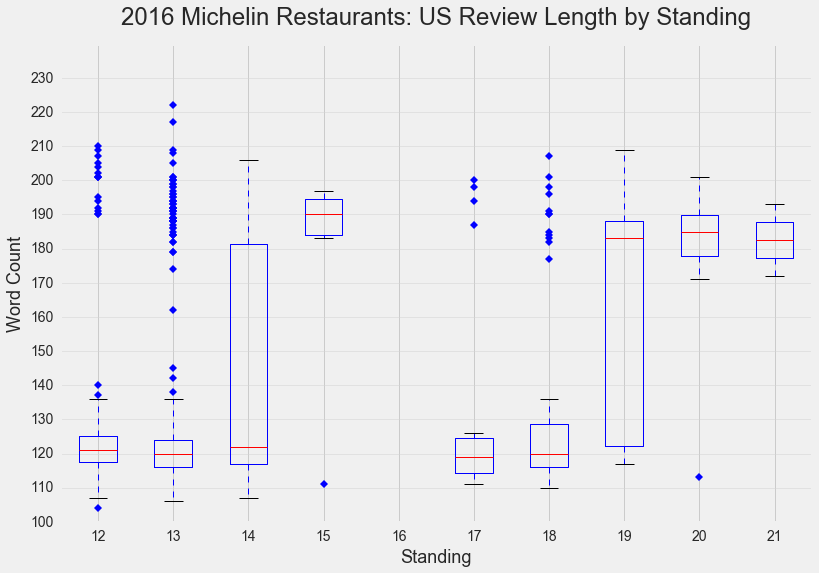

In [446]:
data = [df_USD[df_USD['standing'] == 12]['num_words'], 
        df_USD[df_USD['standing'] == 13]['num_words'], 
        df_USD[df_USD['standing'] == 14]['num_words'],
        df_USD[df_USD['standing'] == 15]['num_words'],
        df_USD[df_USD['standing'] == 16]['num_words'],
        df_USD[df_USD['standing'] == 17]['num_words'],
        df_USD[df_USD['standing'] == 18]['num_words'],
        df_USD[df_USD['standing'] == 19]['num_words'],
        df_USD[df_USD['standing'] == 20]['num_words'],
        df_USD[df_USD['standing'] == 21]['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: US Review Length by Standing', y = 1.03, \
              fontsize = 24)
ax1.set_xlabel('Standing', fontsize = 18)
ax1.set_ylabel('Word Count', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 10
#ax1.set_xlim(0.5, numBoxes + 0.5)
#ax1.set_ylim(-10, 450)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', \
                                        '20', '21'])
     
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(100, 240, 10), fontsize = 14)

plt.show()

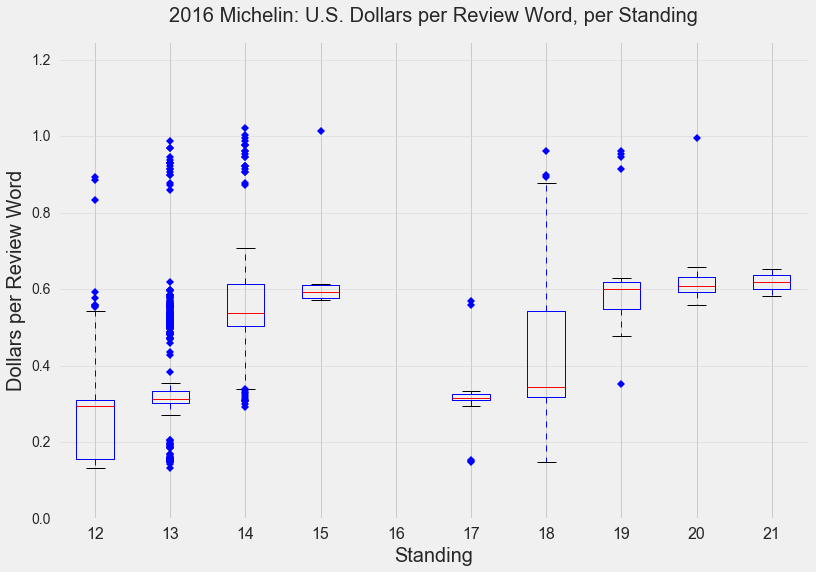

In [259]:
data = [df_USD[df_USD['standing'] == 12]['avg_USD']/df_USD[df_USD['standing'] == 12]['num_words'], 
        df_USD[df_USD['standing'] == 13]['avg_USD']/df_USD[df_USD['standing'] == 13]['num_words'], 
        df_USD[df_USD['standing'] == 14]['avg_USD']/df_USD[df_USD['standing'] == 14]['num_words'],
        df_USD[df_USD['standing'] == 15]['avg_USD']/df_USD[df_USD['standing'] == 15]['num_words'],
        df_USD[df_USD['standing'] == 16]['avg_USD']/df_USD[df_USD['standing'] == 16]['num_words'],
        df_USD[df_USD['standing'] == 17]['avg_USD']/df_USD[df_USD['standing'] == 17]['num_words'],
        df_USD[df_USD['standing'] == 18]['avg_USD']/df_USD[df_USD['standing'] == 18]['num_words'],
        df_USD[df_USD['standing'] == 19]['avg_USD']/df_USD[df_USD['standing'] == 19]['num_words'],
        df_USD[df_USD['standing'] == 20]['avg_USD']/df_USD[df_USD['standing'] == 20]['num_words'],
        df_USD[df_USD['standing'] == 21]['avg_USD']/df_USD[df_USD['standing'] == 21]['num_words']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: U.S. Dollars per Review Word, per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Dollars per Review Word', fontsize = 20)

# Set the axes ranges and axes labels
#numBoxes = 5
#ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(0, 1.25)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

What's that restaurant at standing 20 with fewer than 120 words?

In [224]:
df_USD[(df_USD['standing'] == 20) & (df_USD['num_words'] < 120)][['name', 'cuisine', 'stars']]

,name,cuisine,stars
11741,The Four Seasons,American,0


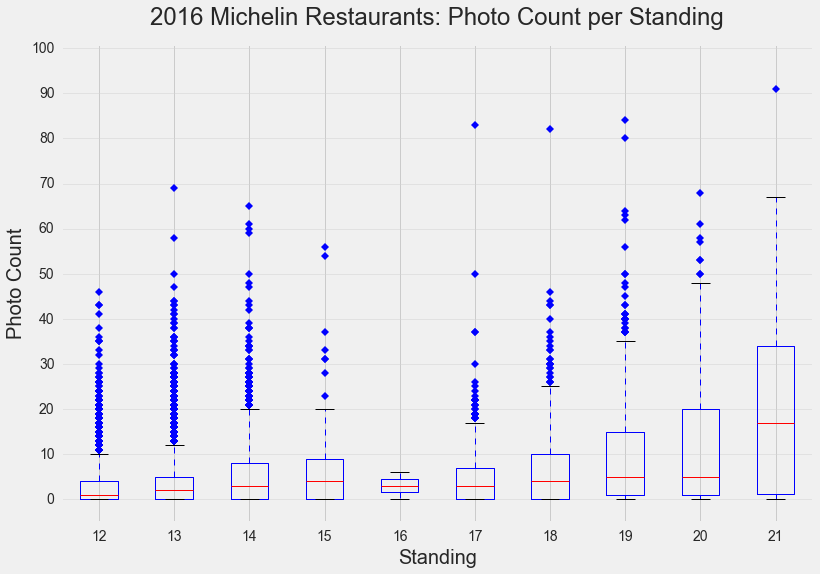

In [451]:
data = [df[df['standing'] == 12]['photo_count'], 
        df[df['standing'] == 13]['photo_count'], 
        df[df['standing'] == 14]['photo_count'],
        df[df['standing'] == 15]['photo_count'],
        df[df['standing'] == 16]['photo_count'],
        df[df['standing'] == 17]['photo_count'],
        df[df['standing'] == 18]['photo_count'],
        df[df['standing'] == 19]['photo_count'],
        df[df['standing'] == 20]['photo_count'],
        df[df['standing'] == 21]['photo_count']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin Restaurants: Photo Count per Standing', y = 1.03, fontsize = 24)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Photo Count', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(data)
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-5, 101)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', \
                                        '20', '21'])
     
plt.setp(xtickNames, fontsize=14)
plt.yticks(range(0, 110, 10), fontsize = 14)

plt.show()

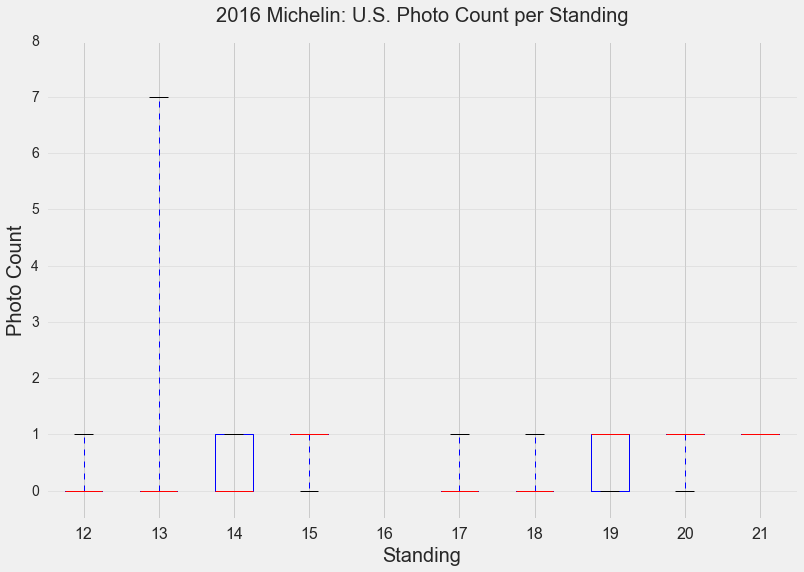

In [340]:
data = [df_USD[df_USD['standing'] == 12]['photo_count'], 
        df_USD[df_USD['standing'] == 13]['photo_count'], 
        df_USD[df_USD['standing'] == 14]['photo_count'],
        df_USD[df_USD['standing'] == 15]['photo_count'],
        df_USD[df_USD['standing'] == 16]['photo_count'],
        df_USD[df_USD['standing'] == 17]['photo_count'],
        df_USD[df_USD['standing'] == 18]['photo_count'],
        df_USD[df_USD['standing'] == 19]['photo_count'],
        df_USD[df_USD['standing'] == 20]['photo_count'],
        df_USD[df_USD['standing'] == 21]['photo_count']]

plt.style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(12, 8))
fig.canvas.set_window_title('')
plt.subplots_adjust(\
#                    left=0.075, right=0.95, top=0.9, bottom=0.25\
                   )

bp = plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('2016 Michelin: U.S. Photo Count per Standing', y =1.03)
ax1.set_xlabel('Standing', fontsize = 20)
ax1.set_ylabel('Photo Count', fontsize = 20)

# Set the axes ranges and axes labels
numBoxes = len(data)
ax1.set_xlim(0.5, numBoxes + 0.5)
ax1.set_ylim(-0.5, 8)
xtickNames = plt.setp(ax1, xticklabels=['12', '13', '14', '15', '16', '17', '18', '19', \
                                        '20', '21'])
     
plt.setp(xtickNames, fontsize=16)

plt.show()

Wow, not a lot of photos per U.S. restaurant!  Who has the most?

In [281]:
df_USD[df_USD['photo_count'] > 2][['name', 'cuisine', 'photo_count']]

,name,cuisine,photo_count
11558,The Kenwood,Californian,7
12695,Café China,Chinese,6


Great capture at Café China, nice work:

In [282]:
Image(url= "https://download.viamichelin.com/media/image2/XL/F7/OC/hi/RfTViXiaYq4NHq7A.jpg")

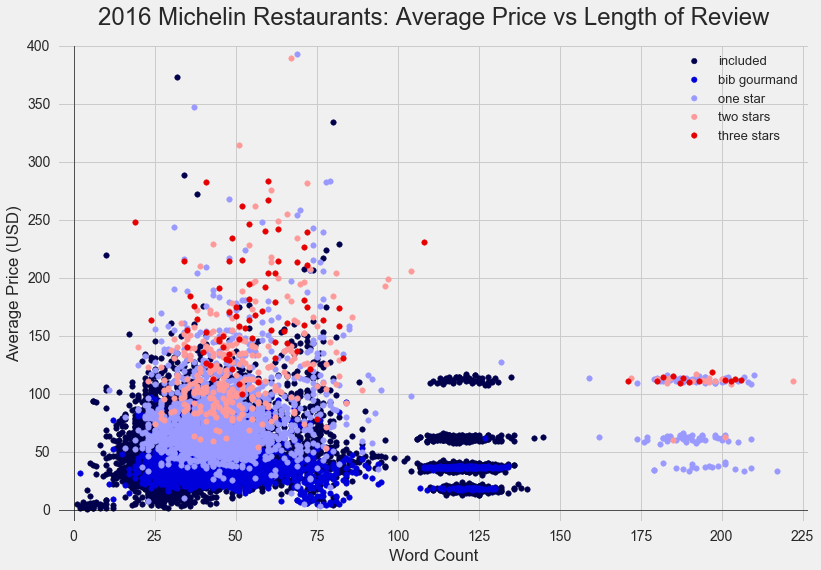

In [470]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    
    
## DO NOT USE THESE SLICES ELSEWHERE they're missing standing == 0
df_incl = df[df['included'] == 1]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.scatter(df_incl['num_words'], rand_jitter(df_incl['avg_USD']), color = distinction_colors[0], \
            alpha = 1, s = 30, label = 'included')
plt.scatter(df_bib['num_words'], rand_jitter(df_bib['avg_USD']), color = distinction_colors[1], \
            alpha = 1, s = 30, label = 'bib gourmand')
plt.scatter(df_1['num_words'], rand_jitter(df_1['avg_USD']), color = distinction_colors[2], \
            alpha = 1, s = 30, label = 'one star')
plt.scatter(df_2['num_words'], rand_jitter(df_2['avg_USD']), color = distinction_colors[3], \
            alpha = 1, s = 30, label = 'two stars')
plt.scatter(df_3['num_words'], rand_jitter(df_3['avg_USD']), color = distinction_colors[4], \
            alpha = 1, s = 30, label = 'three stars')

plt.axvline(0, color='black', linestyle='solid', linewidth=1.0, alpha = 0.6)
plt.axhline(0, color='black', linestyle='solid', linewidth=1.0, alpha = 0.6)



plt.title('2016 Michelin Restaurants: Average Price vs Length of Review', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Average Price (USD)')
plt.yticks(range(0, 420, 50))

# x label
plt.xlabel('Word Count')
plt.xticks(range(0, 250, 25), fontsize = 14)

# set the figure boundaries
plt.ylim([-10, 402])
plt.xlim([-5, 227])
plt.grid(True)
plt.legend(loc='upper right', fontsize = 13)

plt.show()

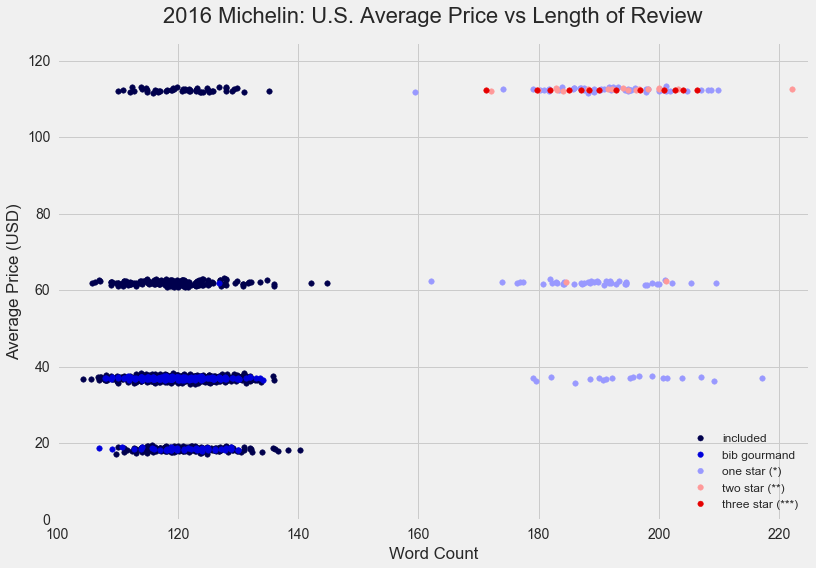

In [286]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))

def rand_jitter(arr):
    stdev = .005*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev    
    
plt.scatter(rand_jitter(df_incl_USD['num_words']), rand_jitter(df_incl_USD['avg_USD']), \
            color = distinction_colors[0], \
            alpha = 1, s = 30, label = 'included')
plt.scatter(rand_jitter(df_bib_USD['num_words']), rand_jitter(df_bib_USD['avg_USD']), \
            color = distinction_colors[1], \
            alpha = 1, s = 30, label = 'bib gourmand')
plt.scatter(rand_jitter(df_1_USD['num_words']), rand_jitter(df_1_USD['avg_USD']), \
            color = distinction_colors[2], \
            alpha = 1, s = 30, label = 'one-star')
plt.scatter(rand_jitter(df_2_USD['num_words']), rand_jitter(df_2_USD['avg_USD']), \
            color = distinction_colors[3], \
            alpha = 1, s = 30, label = 'two-star')
plt.scatter(rand_jitter(df_3_USD['num_words']), rand_jitter(df_3_USD['avg_USD']), \
            color = distinction_colors[4], \
            alpha = 1, s = 30, label = 'three-star')



plt.title('2016 Michelin: U.S. Average Price vs Length of Review', fontsize = 22, y = 1.03)

# y label
plt.ylabel('Average Price (USD)')

# x label
plt.xlabel('Word Count')

# set the figure boundaries
plt.ylim([0, 125])
plt.xlim([100, 225])
plt.grid(True)
plt.legend(loc='lower right', fontsize = 12)

plt.show()

U.S. price ranges are much more granular than non-U.S. ones!  They're all clustered around a few y-values.

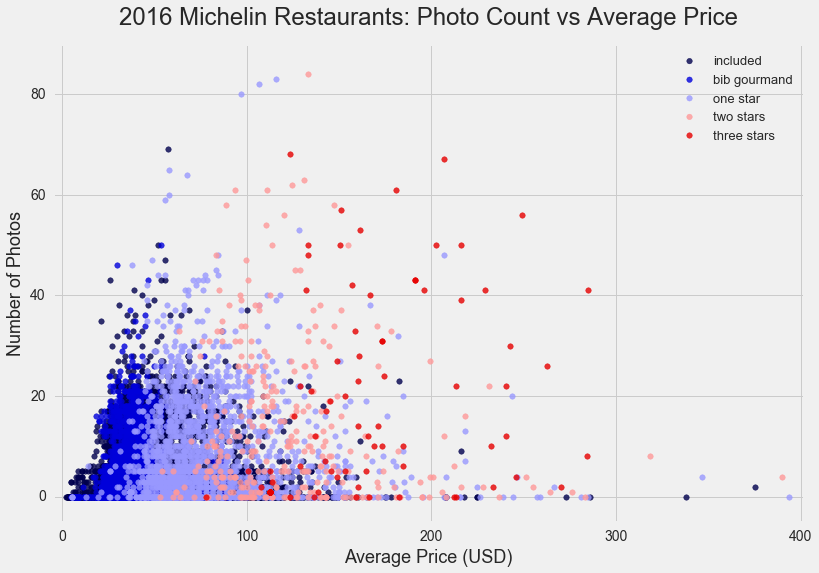

In [483]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight') 

plt.scatter(df_incl['avg_USD'], df_incl['photo_count'], \
            color = distinction_colors[0], alpha = 0.8, s = 30, label = 'included')
plt.scatter(df_bib['avg_USD'], df_bib['photo_count'], \
            color = distinction_colors[1], alpha = 0.8, s = 30, label = 'bib gourmand')
plt.scatter(df_1['avg_USD'], df_1['photo_count'], \
            color = distinction_colors[2], alpha = 0.8, s = 30, label = 'one star')
plt.scatter(df_2['avg_USD'], df_2['photo_count'], \
            color = distinction_colors[3], alpha = 0.8, s = 30, label = 'two stars')
plt.scatter(df_3['avg_USD'], df_3['photo_count'], \
            color = distinction_colors[4], alpha = 0.8, s = 30, label = 'three stars')



plt.title('2016 Michelin Restaurants: Photo Count vs Average Price', \
          fontsize = 24, y = 1.03)

# y label
plt.ylabel('Number of Photos', fontsize = 18)

# x label
plt.xlabel('Average Price (USD)', fontsize = 18)

# set the figure boundaries
plt.ylim([-5, 90])
plt.xlim([-5, 402])
plt.grid(True)
plt.legend(loc='upper right', fontsize = 13)

plt.show()

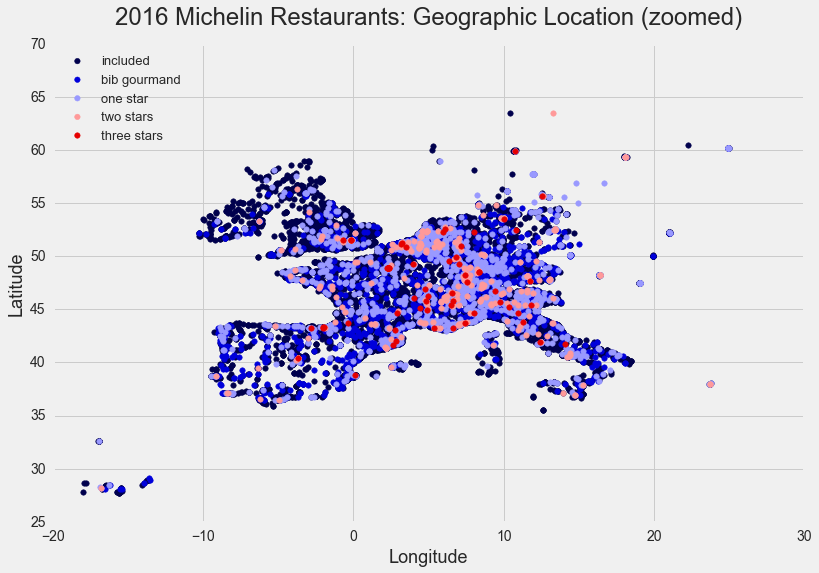

In [486]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.scatter(df_incl['longitude'], df_incl['latitude'], color = distinction_colors[0], \
            alpha = 1, s = 30, label = 'included')
plt.scatter(df_bib['longitude'], df_bib['latitude'], color = distinction_colors[1], \
            alpha = 1, s = 30, label = 'bib gourmand')
plt.scatter(df_1['longitude'], df_1['latitude'], color = distinction_colors[2], \
            alpha = 1, s = 30, label = 'one star')
plt.scatter(df_2['longitude'], df_2['latitude'], color = distinction_colors[3], \
            alpha = 1, s = 30, label = 'two stars')
plt.scatter(df_3['longitude'], df_3['latitude'], color = distinction_colors[4], \
            alpha = 1, s = 30, label = 'three stars')



plt.title('2016 Michelin Restaurants: Geographic Location (zoomed)', fontsize = 24, y = 1.03)

# y label
plt.ylabel('Latitude', fontsize = 18)

# x label
plt.xlabel('Longitude', fontsize = 18)

# set the figure boundaries
plt.ylim([25, 70])
plt.xlim([-20, 30])
plt.grid(True)
plt.legend(loc='upper left', fontsize = 13)

plt.show()

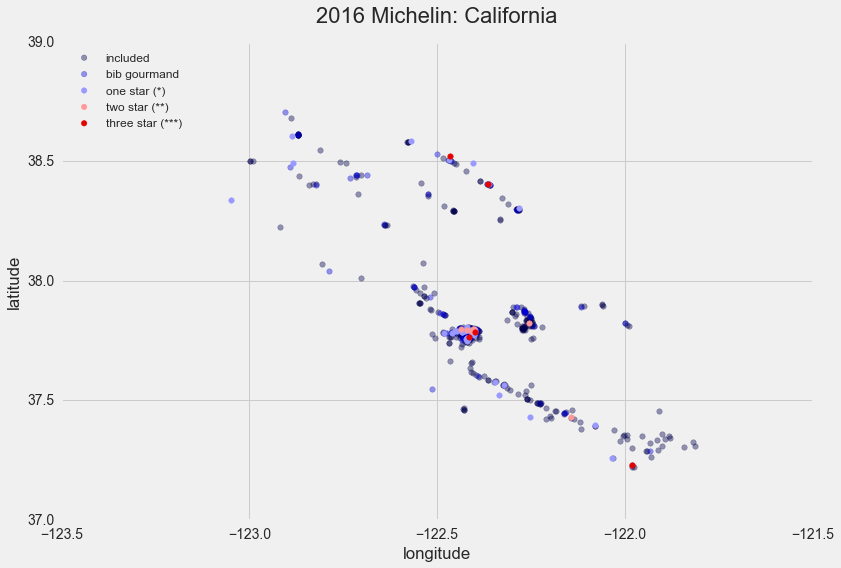

In [305]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))


df_incl = df[(df['stars'] == 0) & (df['bib'] == 0)]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.scatter(df_incl['longitude'], df_incl['latitude'], color = distinction_colors[0], \
            alpha = 0.4, s = 30, label = 'included')
plt.scatter(df_bib['longitude'], df_bib['latitude'], color = distinction_colors[1], \
            alpha = 0.4, s = 30, label = 'bib gourmand')
plt.scatter(df_1['longitude'], df_1['latitude'], color = distinction_colors[2], \
            alpha = 1, s = 30, label = 'one-star')
plt.scatter(df_2['longitude'], df_2['latitude'], color = distinction_colors[3], \
            alpha = 1, s = 30, label = 'two-star')
plt.scatter(df_3['longitude'], df_3['latitude'], color = distinction_colors[4], \
            alpha = 1, s = 30, label = 'three-star')



plt.title('2016 Michelin: California', fontsize = 22, y = 1.03)

# y label
plt.ylabel('latitude')

# x label
plt.xlabel('longitude')

# set the figure boundaries
plt.ylim([37, 39])
plt.xlim([-123.5, -121.5])
plt.grid(True)
plt.legend(loc='upper left', fontsize = 12)

plt.show()

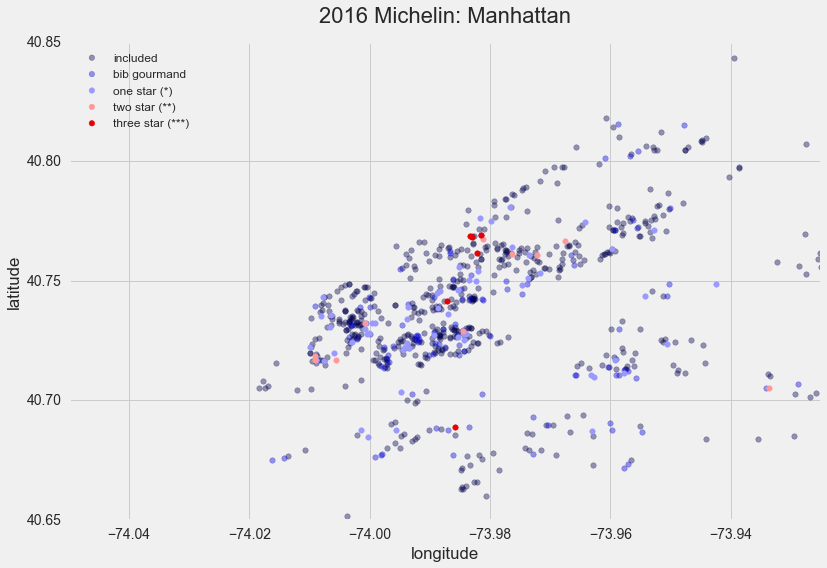

In [319]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

distinction_colors = []
for i in range(0, 256, 256/5):
    distinction_colors.append(cm.seismic(i))


df_incl = df[(df['stars'] == 0) & (df['bib'] == 0)]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.scatter(df_incl['longitude'], df_incl['latitude'], color = distinction_colors[0], \
            alpha = 0.4, s = 30, label = 'included')
plt.scatter(df_bib['longitude'], df_bib['latitude'], color = distinction_colors[1], \
            alpha = 0.4, s = 30, label = 'bib gourmand')
plt.scatter(df_1['longitude'], df_1['latitude'], color = distinction_colors[2], \
            alpha = 1, s = 30, label = 'one-star')
plt.scatter(df_2['longitude'], df_2['latitude'], color = distinction_colors[3], \
            alpha = 1, s = 30, label = 'two-star')
plt.scatter(df_3['longitude'], df_3['latitude'], color = distinction_colors[4], \
            alpha = 1, s = 30, label = 'three-star')



plt.title('2016 Michelin: Manhattan', fontsize = 22, y = 1.03)

# y label
plt.ylabel('latitude')

# x label
plt.xlabel('longitude')

# set the figure boundaries
plt.ylim([40.65, 40.85])
plt.xlim([-74.05, -73.925])
plt.grid(True)
plt.legend(loc='upper left', fontsize = 12)

plt.show()

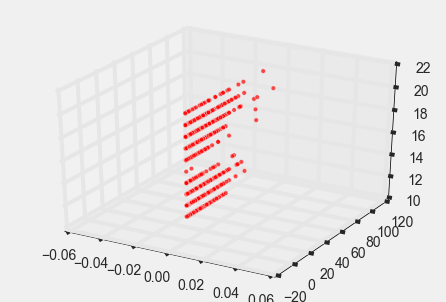

In [320]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(\
           #df['num_words']
           [0]*len(df), df['photo_count'], df['standing'], zdir='z',c='red', alpha=.7)
plt.show()

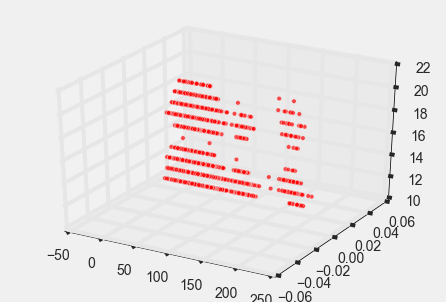

In [321]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(df['num_words'], [0]*len(df), \
           #df['photo_count'], 
           df['standing'], zdir='z',c='red', alpha=.7)
plt.show()

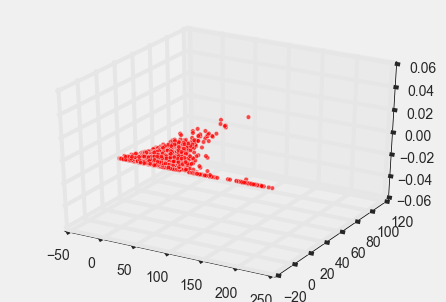

In [322]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(df['num_words'], df['photo_count'], [0]*len(df)\
           #, df['standing']
           , zdir='z',c='red', alpha=.7)
plt.show()

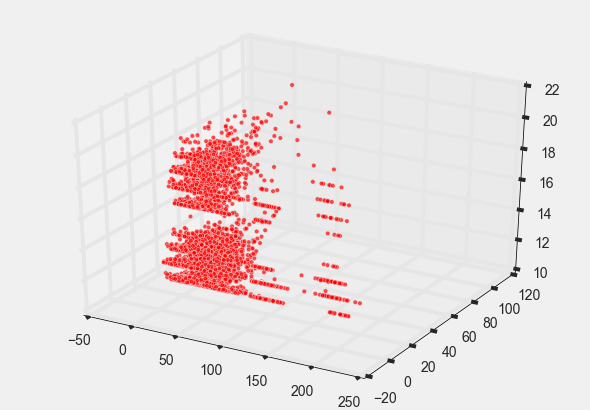

In [262]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(df['num_words'], df['photo_count'],
            df['standing']
           , zdir='z',c='red', alpha=.7)
plt.show()

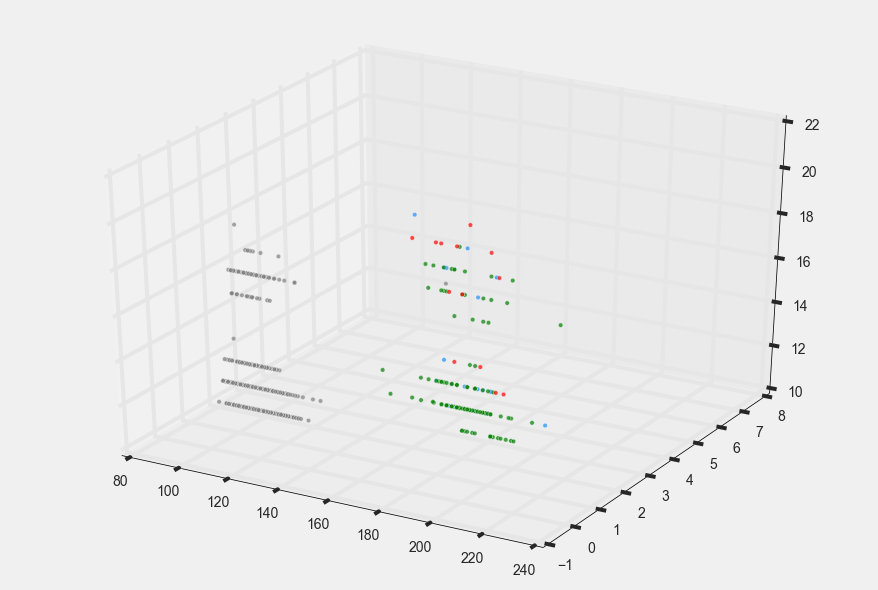

In [356]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure(figsize = (12,8))
ax = Axes3D(fig)
ax.scatter(df_3_USD['num_words'], df_3_USD['photo_count'], df_3_USD['standing'], zdir='z',c='red', alpha=.7)
ax.scatter(df_2_USD['num_words'], df_2_USD['photo_count'], df_2_USD['standing'], zdir='z',c='dodgerblue', alpha=.7)
ax.scatter(df_1_USD['num_words'], df_1_USD['photo_count'], df_1_USD['standing'], zdir='z',c='green', alpha=.7)
ax.scatter(df_incl_USD['num_words'], df_incl_USD['photo_count'], df_incl_USD['standing'], zdir='z',c='grey', alpha=.7)
plt.show()

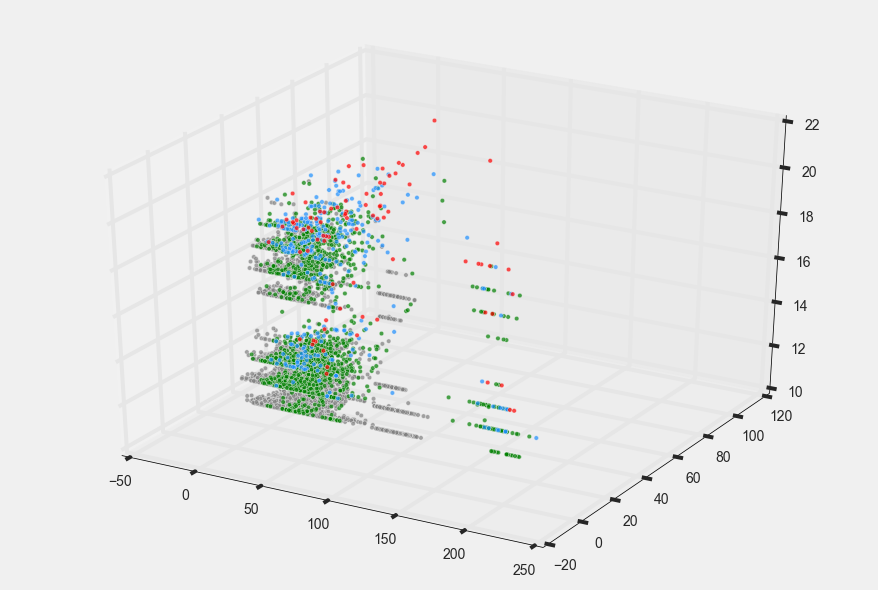

In [370]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

fig = pylab.figure(figsize = (12,8))
ax = Axes3D(fig)
ax.scatter(df_3['num_words'], df_3['photo_count'], df_3['standing'], zdir='z',c='red', alpha=.7)
ax.scatter(df_2['num_words'], df_2['photo_count'], df_2['standing'], zdir='z',c='dodgerblue', alpha=.7)
ax.scatter(df_1['num_words'], df_1['photo_count'], df_1['standing'], zdir='z',c='green', alpha=.7)
ax.scatter(df_incl['num_words'], df_incl['photo_count'], df_incl['standing'], zdir='z',c='grey', alpha=.7)
plt.show()

In [487]:
standing_list = []
for i in range(len(df['standing'].unique())):
    standing_list.append(df['standing'].unique()[i])


standing_order = range(len(df['standing'].unique()))

standing_dict = dict(zip(standing_list, standing_order))

ystand = pd.DataFrame(df['standing'].value_counts())
y1stand = pd.DataFrame(df[df['stars'] == 1]['standing'].value_counts())
y2stand = pd.DataFrame(df[df['stars'] == 2]['standing'].value_counts())
y3stand = pd.DataFrame(df[df['stars'] == 3]['standing'].value_counts())
ybibstand = pd.DataFrame(df[df['bib'] == 1]['standing'].value_counts())
y0stand = pd.DataFrame(df[df['included'] == 1]['standing'].value_counts())
big_ystand = pd.concat([ystand, y0stand, ybibstand, y1stand, y2stand, y3stand], axis = 1)
big_ystand.columns = ['all', 'inclusion', 'bib gourmand', 'one-star', 'two-star', 'three-star']
big_ystand['standing'] = big_ystand.index
big_ystand = big_ystand.reset_index(drop = True)
big_ystand = big_ystand[big_ystand['standing'] != 0]
standing_order = range(len(df['standing'].unique()))

big_ystand_dict = dict(zip(standing_list, standing_order))

big_ystand = big_ystand.set_index('standing', drop = True)

big_ystand = big_ystand.fillna(0)
big_ystand

,all,inclusion,bib gourmand,one-star,two-star,three-star
standing,,,,,,
12.0,6184,4733,1340.0,111,0.0,0.0
13.0,7539,5951,1041.0,529,18.0,0.0
14.0,1732,1092,45.0,531,57.0,7.0
15.0,102,33,0.0,34,25.0,10.0
16.0,2,1,0.0,1,0.0,0.0
17.0,466,307,96.0,59,3.0,1.0
18.0,843,537,66.0,216,21.0,3.0
19.0,678,263,4.0,302,98.0,11.0
20.0,203,26,0.0,56,82.0,39.0


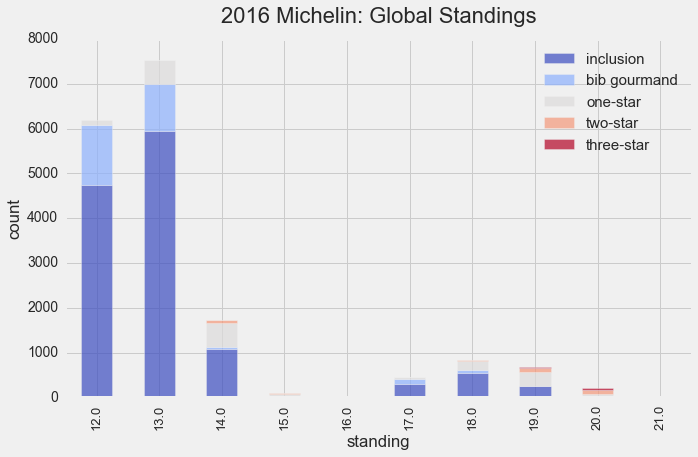

In [488]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#big_ystand = big_ystand.sort('all', ascending = False)
big_ystand[['inclusion', 'bib gourmand', 'one-star', 'two-star', 'three-star']]\
    .plot(kind = 'bar', alpha = 0.7, stacked = True, colormap = 'coolwarm', figsize = (10,6))

#standing_colors = []
# for i in range(0, 256, 256/len(df['standing'].unique())):
#     standing_colors.append(cm.coolwarm(i))


df_incl = df[df['included'] == 1]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
df_bib = df[df['bib'] == 1]

plt.title('2016 Michelin: Global Standings', fontsize = 22, y = 1.03)

# y label
plt.ylabel('count')

# x label
plt.xlabel('standing')

# set the figure boundaries
# plt.ylim([40.6, 40.85])
# plt.xlim([-74.025, -73.925])
plt.grid(True)
plt.legend(loc='upper right', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 13)

plt.show()

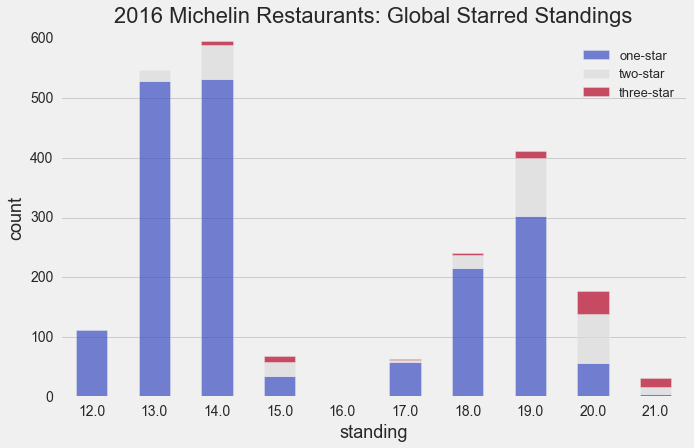

In [495]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

#big_ystand = big_ystand.sort('all', ascending = False)
big_ystand[['one-star', 'two-star', 'three-star']].plot(kind = 'bar', alpha = 0.7, \
                            stacked = True, colormap = 'coolwarm', figsize = (10,6))

#standing_colors = []
# for i in range(0, 256, 256/len(df['standing'].unique())):
#     standing_colors.append(cm.coolwarm(i))


#df_incl = df[df['included'] == 1]
df_1 = df[df['stars'] == 1]
df_2 = df[df['stars'] == 2]
df_3 = df[df['stars'] == 3]
#df_bib = df[df['bib'] == 1]

plt.title('2016 Michelin Restaurants: Global Starred Standings', fontsize = 22, y = 1.03)

# y label
plt.ylabel('count', fontsize = 18)

# x label
plt.xlabel('standing', fontsize = 18)
plt.xticks(rotation = 0, fontsize = 14)

# set the figure boundaries
# plt.ylim([40.6, 40.85])
# plt.xlim([-74.025, -73.925])
plt.grid(True)
plt.grid(which = 'major', axis = 'x')
plt.legend(loc='upper right', fontsize = 13)

plt.show()

In [ ]:
def how_far_to_people(df):
    nearest_people = []
    for i in range(len(df['town'])):
        eat = df['lat_lon'][i]
        people = df['FILL IN TOWN COLUMN'][i]
        too_far = great_circle(eat, people).kilometers
        nearest_people.append(too_far)
    df['nearest_people'] = nearest_people
    return df

In [272]:
#cPickle.dump(df, open('assets/big_df_model-ready.p', 'wb'))

In [3]:
len(df[df['currency'] == 'USD'])

1681

In [329]:
df.columns

Index([u'name', u'cuisine', u'blurb', u'currency', u'photos', u'add_info',
       u'stars', u'name_len', u'name_count', u'high_price', u'low_price',
       u'num_words', u'photo_count', u'latitude', u'longitude', u'avg_USD',
       u'standing', u'bib', u'included', u'assiette', u'value_menu', u'BRL',
       u'CHF', u'CZK', u'DKK', u'EUR', u'GBP', u'HKD', u'HUF', u'MOP', u'NOK',
       u'PLN', u'SEK', u'SGD', u'USD', u'interesting_wine',
       u'french_english_wine', u'wine', u'view', u'garden', u'outside_dining',
       u'air_conditioning', u'no_dogs', u'parking', u'dinner_only',
       u'wheelchair', u'private_dining', u'with_rooms', u'booking',
       u'lunch_only', u'tennis', u'dinner_tasting', u'valet'],
      dtype='object')

In [334]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, \
    roc_auc_score, roc_curve
import matplotlib.patheffects as path_effects

In [371]:
y = df[['stars']]
X = df[['name_len', u'name_count', u'high_price', u'low_price',
       u'num_words', u'photo_count', u'latitude', u'longitude', u'avg_USD',
       u'standing', \
#        u'bib', u'included', \
        u'assiette', u'value_menu', u'BRL',
       u'CHF', u'CZK', u'DKK', u'EUR', u'GBP', u'HKD', u'HUF', u'MOP', u'NOK',
       u'PLN', u'SEK', u'SGD', u'USD', u'interesting_wine',
       u'french_english_wine', u'wine', u'view', u'garden', u'outside_dining',
       u'air_conditioning', u'no_dogs', u'parking', u'dinner_only',
       u'wheelchair', u'private_dining', u'with_rooms', u'booking',
       u'lunch_only', u'tennis', u'dinner_tasting', u'valet']]

In [336]:
y = df['stars']
X_scaled = MinMaxScaler().fit_transform(X.astype(float))
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
len(X_scaled.columns)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state = 42)

print "       X Shape  Y Shape"
print "Train", X_train.shape, y_train.shape
print "Test ", X_test.shape, y_test.shape

In [333]:
n = 50
plot_colors = []
for i in range(0, 256, 256/100):
    plot_colors.append(cm.coolwarm(i))

cv = KFold(len(X_train), n_folds = n, shuffle=False)

def do_plot(model, m=1):
    for fold, color in zip(cv, plot_colors):
        X_train = X_scaled.iloc[fold[0]]
        X_test  = X_scaled.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
                
        plt.scatter(rand_jitter(y_pred), rand_jitter(y_test), color=color, s = 40)
        plt.plot([-0.01, 3.25],[-0.01, 3.25], linewidth = 0.1)
        plt.text(2.5, 3, "R^2: "+str(m), fontsize=16)
    return  

cmat.shape

NameError: name 'KFold' is not defined

In [332]:
def plot_confusion_matrix(cmat, title='Confusion matrix', cmap=plt.cm.Blues, \
                          labels = ['1', '2', '3']):
    
    plt.figure(figsize=(12,8))
    plt.imshow(cmat, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    width, height = cmat.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cmat[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, 
                        foreground='black'), path_effects.Normal()]) 
    return

def getROCcurve(roc, title='ROC Curve', xlabel ='% of False Positives', \
                ylabel = '% of True Positives'):
    fpr, tpr, thresholds = roc
    
    fig,ax = plt.subplots()
    ax.plot(fpr, tpr, label='ROC Curve')

    fig.set_size_inches(7, 6, forward=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc='best')
    plt.plot([0, 1], [0, 1], 'k--', linewidth = 0.4, color = 'magenta')
    return

In [ ]:
dt = DecisionTreeClassifier()

scores = cross_val_score(dt, X_train, y_train, cv=cv)
scores.mean()

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier: Actual vs Predicted', fontsize = 20, y = 1.05)
plt.style.use('fivethirtyeight')


do_plot(dt, scores.mean().round(2))

In [ ]:
dt.fit(X_scaled, y)
features = sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), X_scaled.columns), reverse=True)
features_dt = pd.DataFrame(features, columns = ['importance', 'feature'])
features_dt = features_dt.sort('importance', ascending = False)
features_dt = features_dt.set_index('feature', drop = True)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

features_dt[0:19].plot.bar(color = 'lightgreen')

plt.title('Decision Tree Classifier: Feature Importances', fontsize = 20, y = 1.03)

# y label
plt.ylabel('Coefficient', fontsize = 18)

# x label
plt.xlabel('Feature', fontsize = 12)
plt.axhline(0, color='black', alpha = 0.6)
plt.xticks(rotation = 90, fontsize = 13)

plt.ylim([0, 1])
plt.show()

In [ ]:
y_pred = dt.fit(X_train, y_train).predict(X_test)

pred1 = dt.predict_proba(X_train).T[1]

cmat = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cmat, title='2016 Michelin Stars: Decision Tree Classifier Confusion Matrix')

In [ ]:
def TheAccumulator(df):
    cumulative = []
    total = 0
    for i in range(len(df)):
        cumulative.append(total)
        total += df['importance'][i]
    df['sum'] = cumulative
    df = df.reset_index(drop = True)
    return df

features_dt = TheAccumulator(features_dt)
features_et = TheAccumulator(features_et)
features_gb = TheAccumulator(features_gb)
features_ab = TheAccumulator(features_ab)
features_rf = TheAccumulator(features_rf)

plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

plt.plot(features_dt.index, features_dt['sum'], color = 'Crimson', linewidth = 0.8, label = 'Decision Tree')
plt.plot(features_rf.index, features_rf['sum'], color = 'Orange', linewidth = 0.8, label = 'Random Forest')
plt.plot(features_et.index, features_et['sum'], color = 'DarkOliveGreen', linewidth = 0.8, label = 'Extra Trees')
plt.plot(features_ab.index, features_ab['sum'], color = 'blue', linewidth = 0.4, label = 'Ada Boost')
plt.plot(features_gb.index, features_gb['sum'], color = 'purple', linewidth = 0.8, label = 'Gradient Boost')
plt.axhline(0, color='black', alpha = 0.6)
plt.title('Tree-based Models for IMDb Top 250', fontsize = 20, y = 1.05)

# y label
plt.ylabel('Variance Explained, cumulative')

# x label
plt.xlabel('Index Number', y = 0.1)

plt.xlim([-1, 20])
plt.ylim([0.6, 1.04])
plt.legend(loc='center right', fontsize = 10)

plt.show()